In [6]:
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [7]:
directory ='/Users/liucheng/Desktop/Internship/plate_reader_data /fix_1A01_plate_reader_varing_temperatures '
# use glob to find all files with a specific pattern
file_pattern = os.path.join(directory,"*.xlsx")
files = glob.glob(file_pattern)
print(files)

['/Users/liucheng/Desktop/Internship/plate_reader_data /fix_1A01_plate_reader_varing_temperatures /26C_1A01.xlsx', '/Users/liucheng/Desktop/Internship/plate_reader_data /fix_1A01_plate_reader_varing_temperatures /23.5C_1A01.xlsx', '/Users/liucheng/Desktop/Internship/plate_reader_data /fix_1A01_plate_reader_varing_temperatures /14C_1A01.xlsx', '/Users/liucheng/Desktop/Internship/plate_reader_data /fix_1A01_plate_reader_varing_temperatures /21C_1A01.xlsx', '/Users/liucheng/Desktop/Internship/plate_reader_data /fix_1A01_plate_reader_varing_temperatures /18C_1A01.xlsx', '/Users/liucheng/Desktop/Internship/plate_reader_data /fix_1A01_plate_reader_varing_temperatures /10C_1A01.xlsx']


In [8]:
# list to hold dfs
df_list =[]
for file_path in files:
    # extract temperature from filename
    filename = os.path.basename(file_path)
    temperature_str = filename.split('_')[0]
    temperature = float(temperature_str.replace('C',''))
    #read the file into a df
    df = pd.read_excel(file_path,skiprows=47)
    # Add a column for temperature
    df['Temperature'] = temperature
    
    #append the df to the list
    df_list.append(df)
    
# Combined all dfs into a single df
combined_df = pd.concat(df_list, ignore_index=True)
combined_df


Time (s)  glucose1  glucose2  glucose3  pyruvate1  pyruvate2  pyruvate3  \
0            0     0.092     0.102     0.097      0.100      0.099      0.104   
1          900     0.093     0.105     0.102      0.102      0.102      0.107   
2         1800     0.094     0.106     0.103      0.104      0.103      0.109   
3         2700     0.097     0.106     0.104      0.105      0.103      0.108   
4         3600     0.097     0.106     0.103      0.106      0.104      0.109   
...        ...       ...       ...       ...        ...        ...        ...   
2166    504900     0.206     0.134     0.134      0.269      0.272      0.256   
2167    505800     0.220     0.131     0.131      0.271      0.274      0.258   
2168    506700     0.184     0.132     0.115      0.272      0.274      0.258   
2169    507600     0.124     0.131     0.098      0.269      0.272      0.255   
2170    508500     0.122     0.129     0.098      0.268      0.272      0.256   

      glutamate1  glutamate2  glutamate3  ...  glycerol4  glycerol6  \
0          0.109       0.104       0.103  ...        NaN        NaN   
1          0.110       0.109       0.103  ...        NaN        NaN   
2          0.111       0.111       0.104  ...        NaN        NaN   
3          0.113       0.111       0.104  ...        NaN        NaN   
4          0.112       0.111       0.104  ...        NaN        NaN   
...          ...         ...         ...  ...        ...        ...   
2166       0.303       0.297       0.295  ...        NaN        NaN   
2167       0.304       0.299       0.297  ...        NaN        NaN   
2168       0.305       0.299       0.298  ...        NaN        NaN   
2169       0.302       0.297       0.297  ...        NaN        NaN   
2170       0.302       0.296       0.295  ...        NaN        NaN   

      mannitol4  mannitol5  proline4  proline5  proline6  galactose1.1  \
0           NaN        NaN       NaN       NaN       NaN           NaN   
1           NaN        NaN       NaN       NaN       NaN           NaN   
2           NaN        NaN       NaN       NaN       NaN           NaN   
3           NaN        NaN       NaN       NaN       NaN           NaN   
4           NaN        NaN       NaN       NaN       NaN           NaN   
...         ...        ...       ...       ...       ...           ...   
2166      0.124      0.098       NaN       NaN       NaN           NaN   
2167      0.125      0.100       NaN       NaN       NaN           NaN   
2168      0.114      0.101       NaN       NaN       NaN           NaN   
2169      0.100      0.098       NaN       NaN       NaN           NaN   
2170      0.099      0.097       NaN       NaN       NaN           NaN   

      galactose2.1  mannitol6  
0              NaN        NaN  
1              NaN        NaN  
2              NaN        NaN  
3              NaN        NaN  
4              NaN        NaN  
...            ...        ...  
2166           NaN      0.134  
2167           NaN      0.132  
2168           NaN      0.120  
2169           NaN      0.099  
2170           NaN      0.098  

[2171 rows x 66 columns]

In [9]:
combined_df['Temperature']

0       26.0
1       26.0
2       26.0
3       26.0
4       26.0
        ... 
2166    10.0
2167    10.0
2168    10.0
2169    10.0
2170    10.0
Name: Temperature, Length: 2171, dtype: float64

In [10]:
combined_df[combined_df['Temperature'] == 26.0]['glucose1']

0      0.092
1      0.093
2      0.094
3      0.097
4      0.097
       ...  
352    0.304
353    0.303
354    0.302
355    0.302
356    0.303
Name: glucose1, Length: 357, dtype: float64

In [11]:
df_long = combined_df.melt(id_vars=['Time (s)','Temperature'], var_name='Carbon_Source',value_name ='OD')
# Extract carbon source and replicate number
df_long[['Carbon_Source', 'Replicate']] = df_long['Carbon_Source'].str.extract(r'([a-zA-Z]+)(\d+)')
# Drop rows where 'Replicate' is NaN
df_long = df_long.dropna(subset=['Replicate'])
df_long['Replicate'] = df_long['Replicate'].astype(int)
# convert seconds to hours
df_long['Time (h)'] = df_long['Time (s)']/ 3600
df_long = df_long.drop(columns = ['Time (s)'])
print(df_long)

        Temperature Carbon_Source     OD  Replicate  Time (h)
0              26.0       glucose  0.092          1      0.00
1              26.0       glucose  0.093          1      0.25
2              26.0       glucose  0.094          1      0.50
3              26.0       glucose  0.097          1      0.75
4              26.0       glucose  0.097          1      1.00
...             ...           ...    ...        ...       ...
138939         10.0      mannitol  0.134          6    140.25
138940         10.0      mannitol  0.132          6    140.50
138941         10.0      mannitol  0.120          6    140.75
138942         10.0      mannitol  0.099          6    141.00
138943         10.0      mannitol  0.098          6    141.25

[138944 rows x 5 columns]


/var/folders/pq/y12h6ypd4750kqt2w5clmhq00000gn/T/ipykernel_56212/736425745.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.lineplot(data= subset, x='Time (h)',y='OD', hue='Temperature', ci='sd', palette='coolwarm')


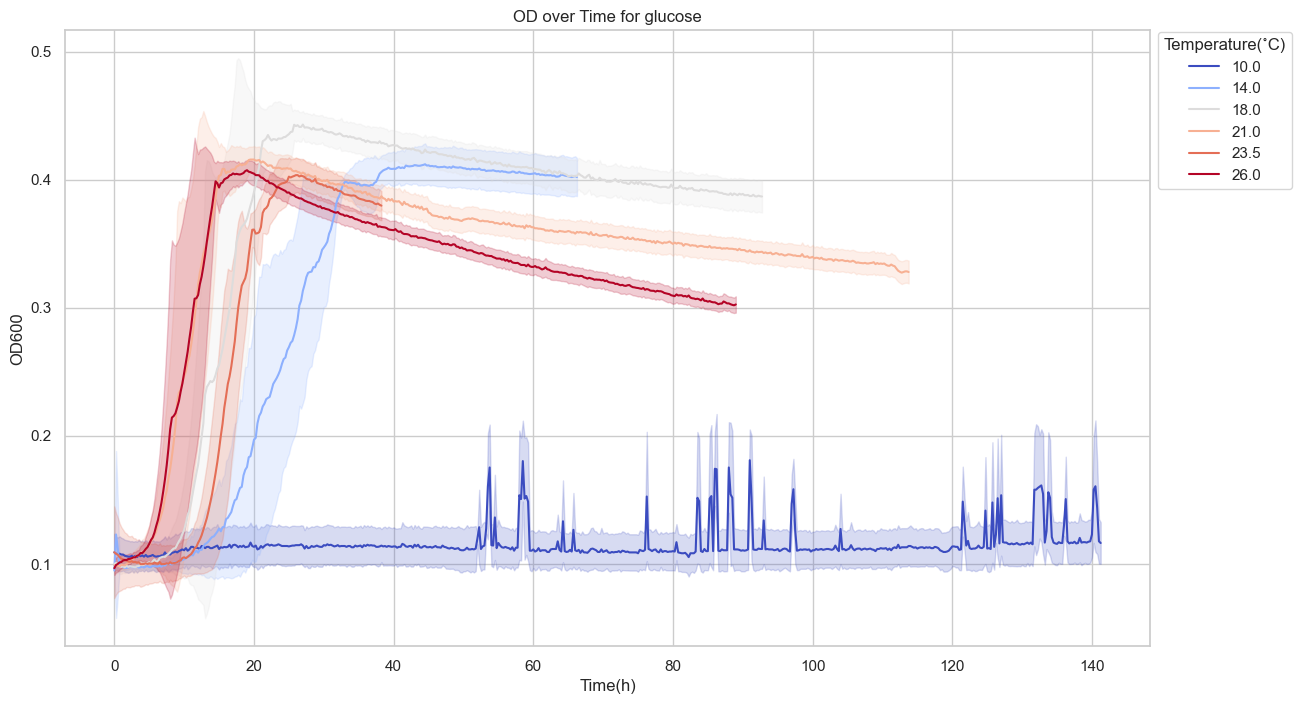

/var/folders/pq/y12h6ypd4750kqt2w5clmhq00000gn/T/ipykernel_56212/736425745.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.lineplot(data= subset, x='Time (h)',y='OD', hue='Temperature', ci='sd', palette='coolwarm')


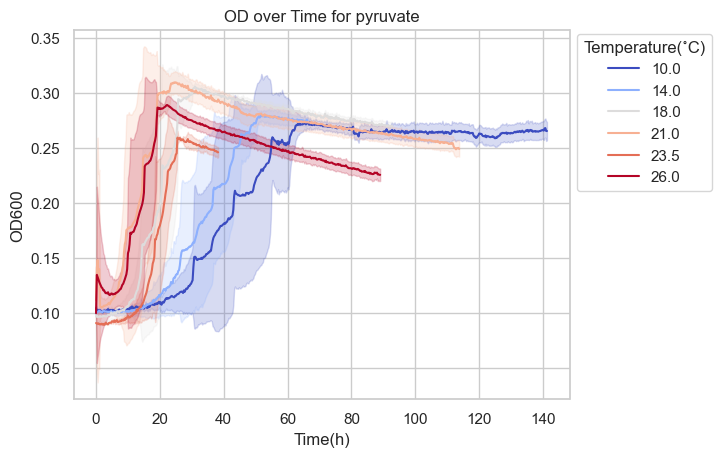

/var/folders/pq/y12h6ypd4750kqt2w5clmhq00000gn/T/ipykernel_56212/736425745.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.lineplot(data= subset, x='Time (h)',y='OD', hue='Temperature', ci='sd', palette='coolwarm')


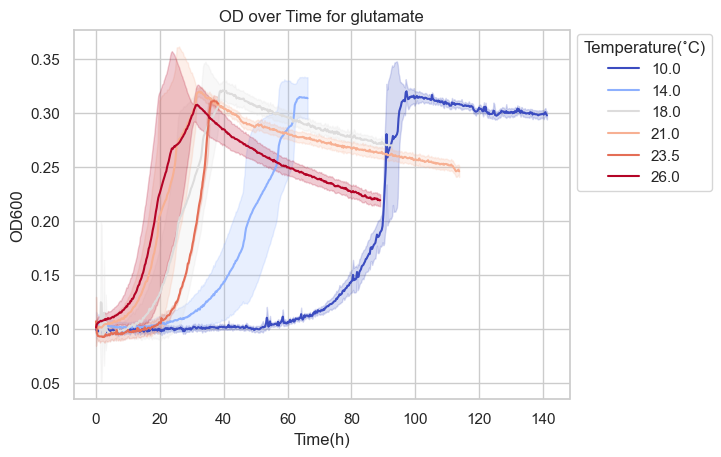

/var/folders/pq/y12h6ypd4750kqt2w5clmhq00000gn/T/ipykernel_56212/736425745.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.lineplot(data= subset, x='Time (h)',y='OD', hue='Temperature', ci='sd', palette='coolwarm')


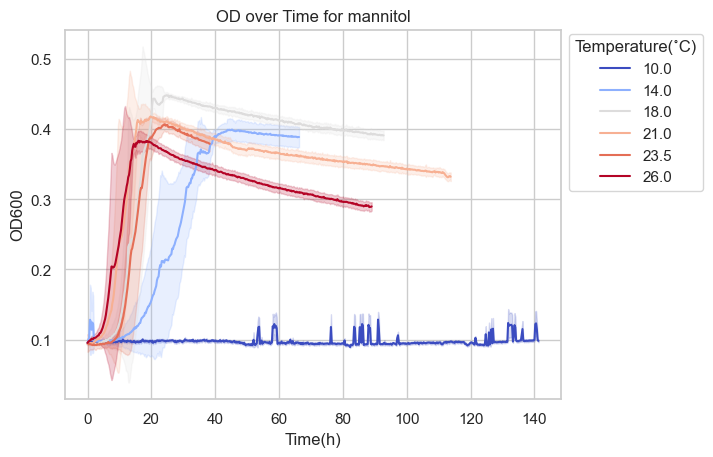

/var/folders/pq/y12h6ypd4750kqt2w5clmhq00000gn/T/ipykernel_56212/736425745.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.lineplot(data= subset, x='Time (h)',y='OD', hue='Temperature', ci='sd', palette='coolwarm')


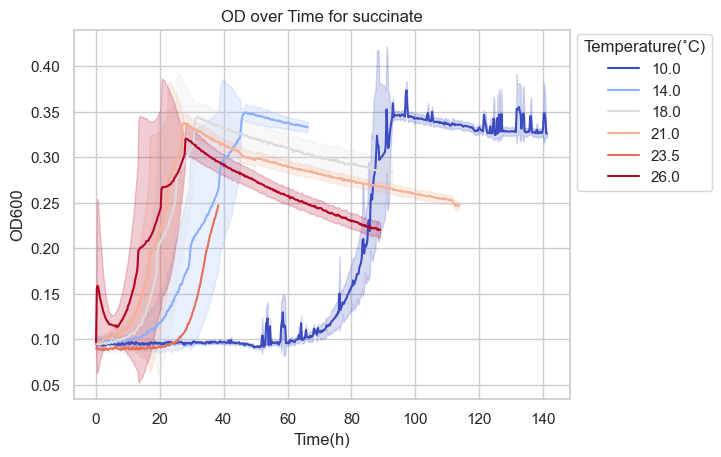

/var/folders/pq/y12h6ypd4750kqt2w5clmhq00000gn/T/ipykernel_56212/736425745.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.lineplot(data= subset, x='Time (h)',y='OD', hue='Temperature', ci='sd', palette='coolwarm')


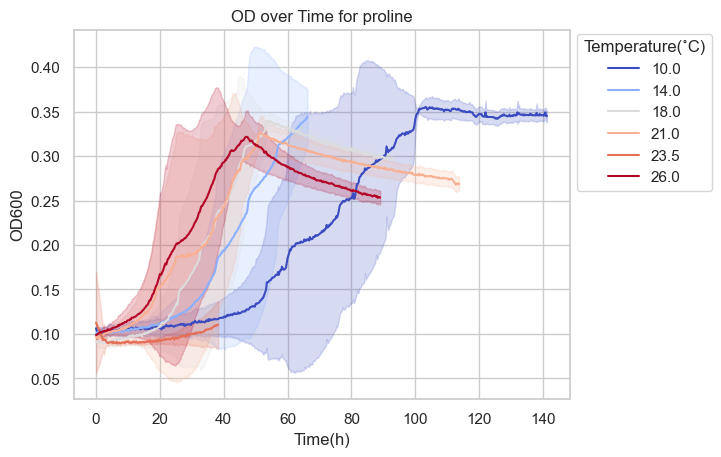

/var/folders/pq/y12h6ypd4750kqt2w5clmhq00000gn/T/ipykernel_56212/736425745.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.lineplot(data= subset, x='Time (h)',y='OD', hue='Temperature', ci='sd', palette='coolwarm')


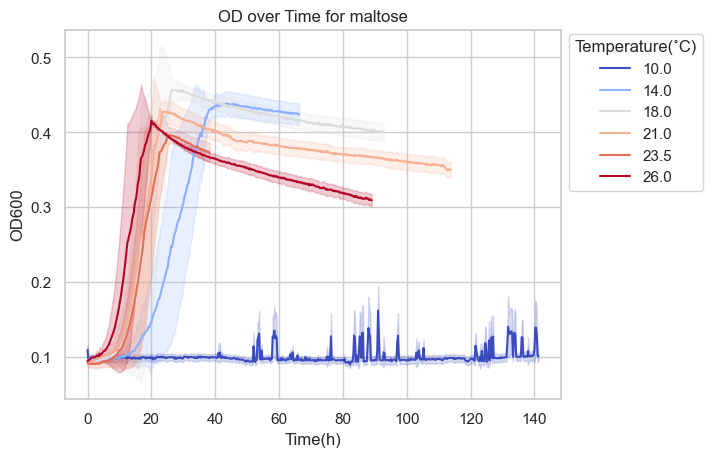

/var/folders/pq/y12h6ypd4750kqt2w5clmhq00000gn/T/ipykernel_56212/736425745.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.lineplot(data= subset, x='Time (h)',y='OD', hue='Temperature', ci='sd', palette='coolwarm')


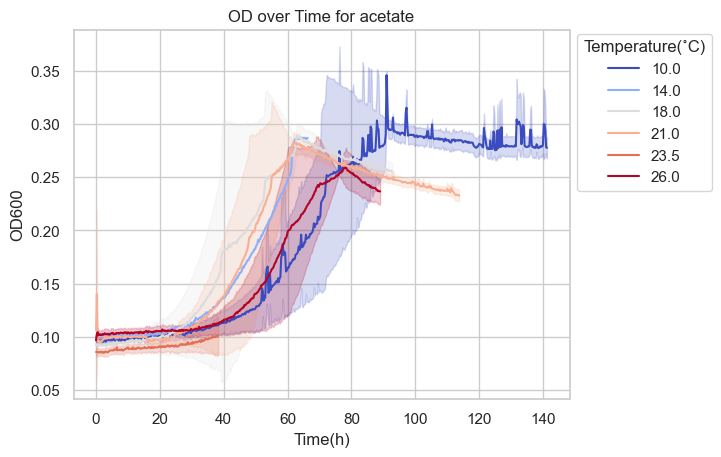

/var/folders/pq/y12h6ypd4750kqt2w5clmhq00000gn/T/ipykernel_56212/736425745.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.lineplot(data= subset, x='Time (h)',y='OD', hue='Temperature', ci='sd', palette='coolwarm')


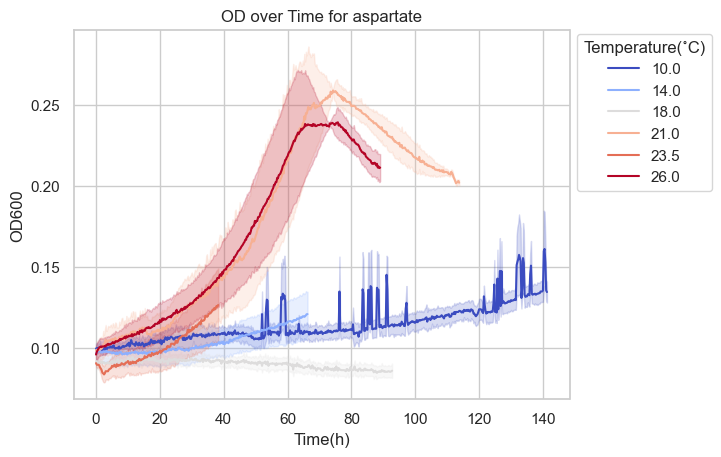

/var/folders/pq/y12h6ypd4750kqt2w5clmhq00000gn/T/ipykernel_56212/736425745.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.lineplot(data= subset, x='Time (h)',y='OD', hue='Temperature', ci='sd', palette='coolwarm')


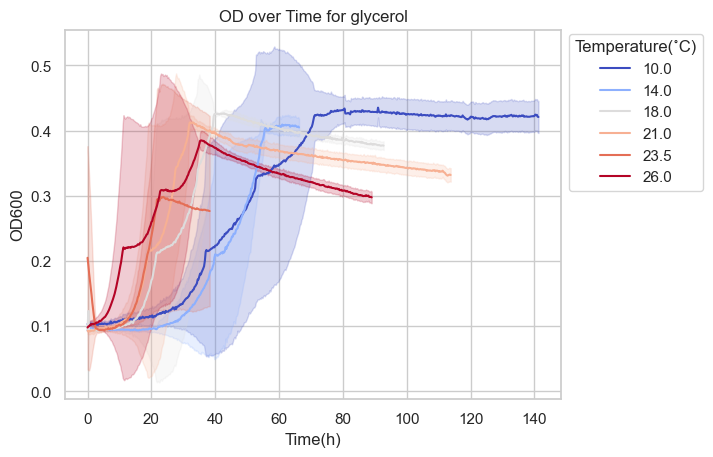

/var/folders/pq/y12h6ypd4750kqt2w5clmhq00000gn/T/ipykernel_56212/736425745.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.lineplot(data= subset, x='Time (h)',y='OD', hue='Temperature', ci='sd', palette='coolwarm')


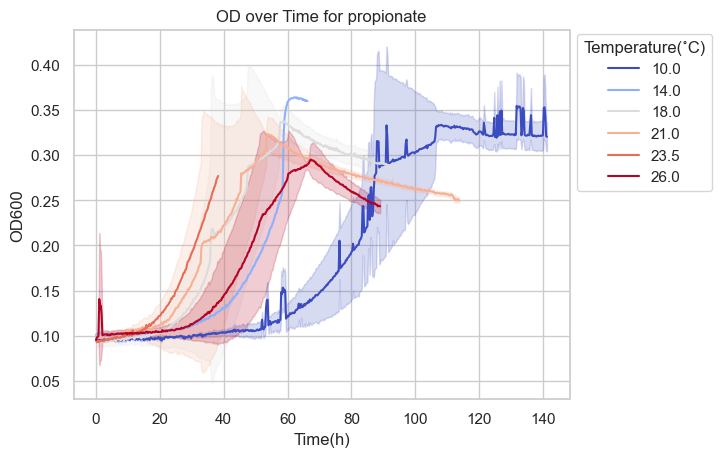

/var/folders/pq/y12h6ypd4750kqt2w5clmhq00000gn/T/ipykernel_56212/736425745.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.lineplot(data= subset, x='Time (h)',y='OD', hue='Temperature', ci='sd', palette='coolwarm')


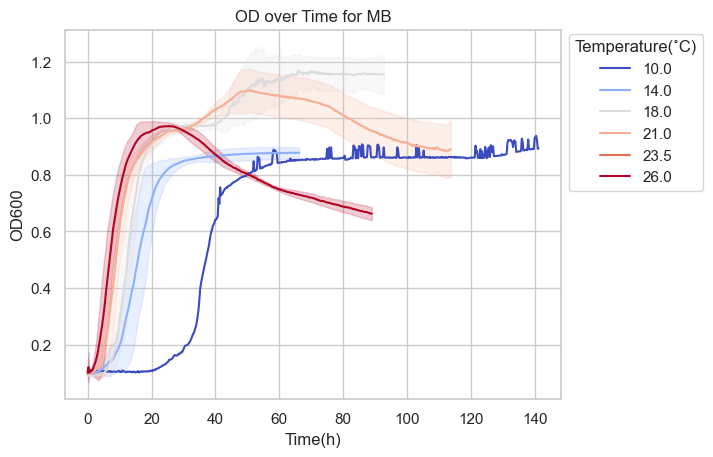

/var/folders/pq/y12h6ypd4750kqt2w5clmhq00000gn/T/ipykernel_56212/736425745.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.lineplot(data= subset, x='Time (h)',y='OD', hue='Temperature', ci='sd', palette='coolwarm')


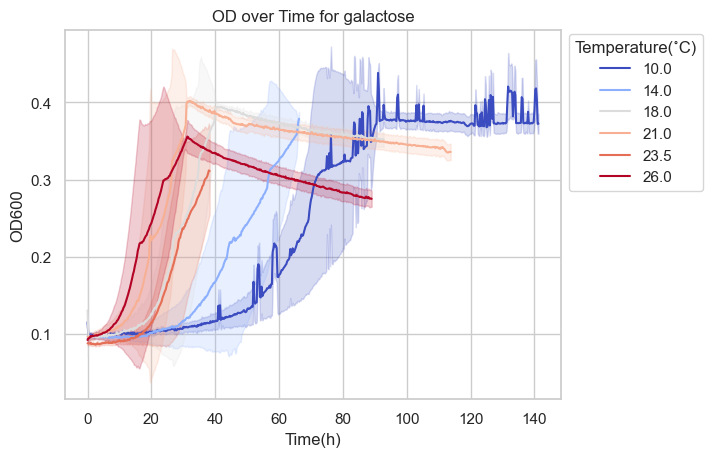

/var/folders/pq/y12h6ypd4750kqt2w5clmhq00000gn/T/ipykernel_56212/736425745.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.lineplot(data= subset, x='Time (h)',y='OD', hue='Temperature', ci='sd', palette='coolwarm')


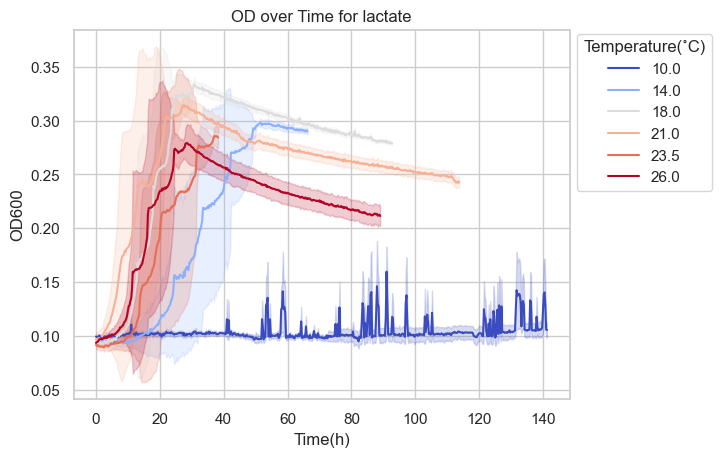

In [12]:
# set the plotting style
sns.set(style='whitegrid')
# initialize the figure
plt.figure(figsize=(14,8))
# loop through each unique carbon source and plot
carbon_sources = df_long['Carbon_Source'].unique()

for carbon_source in carbon_sources:
    subset = df_long[df_long['Carbon_Source']==carbon_source]
    sns.lineplot(data= subset, x='Time (h)',y='OD', hue='Temperature', ci='sd', palette='coolwarm')
    # set titles and labels
    plt.title(f'OD over Time for {carbon_source}')
    plt.xlabel('Time(h)')
    plt.ylabel('OD600')
    plt.legend(title='Temperature(˚C)', loc='upper left', bbox_to_anchor=(1,1.01))                                                                  
    plt.show()

/var/folders/pq/y12h6ypd4750kqt2w5clmhq00000gn/T/ipykernel_56212/2612978463.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.lineplot(data= subset, x='Time (h)',y='OD', hue='Temperature', ci='sd',linewidth=3, palette='coolwarm')


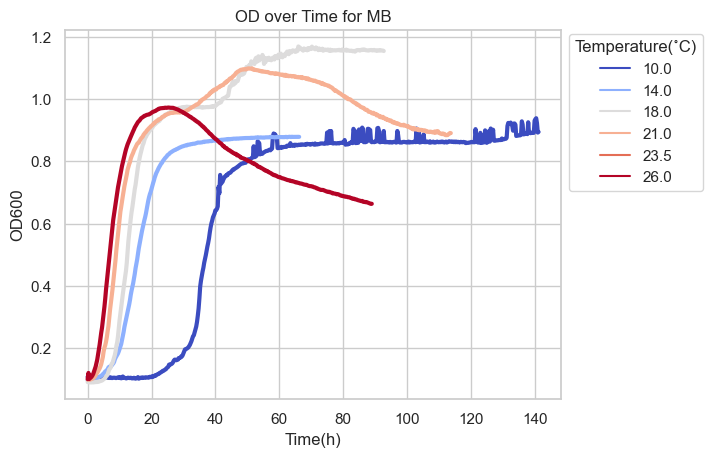

/var/folders/pq/y12h6ypd4750kqt2w5clmhq00000gn/T/ipykernel_56212/2612978463.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.lineplot(data= subset, x='Time (h)',y='OD', hue='Temperature', ci='sd',linewidth=3, palette='coolwarm')


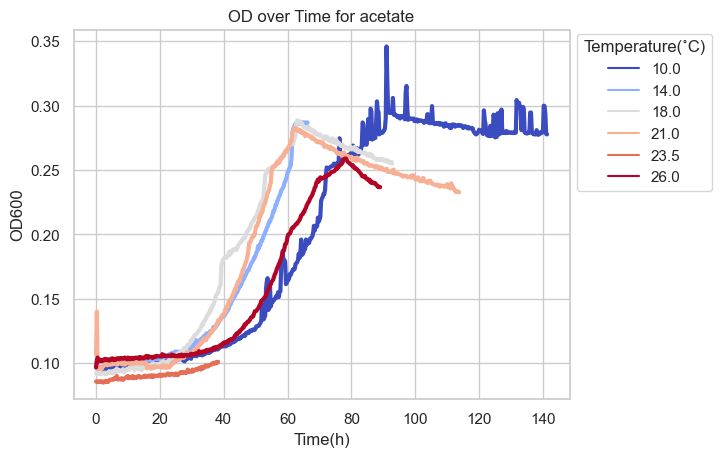

/var/folders/pq/y12h6ypd4750kqt2w5clmhq00000gn/T/ipykernel_56212/2612978463.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.lineplot(data= subset, x='Time (h)',y='OD', hue='Temperature', ci='sd',linewidth=3, palette='coolwarm')


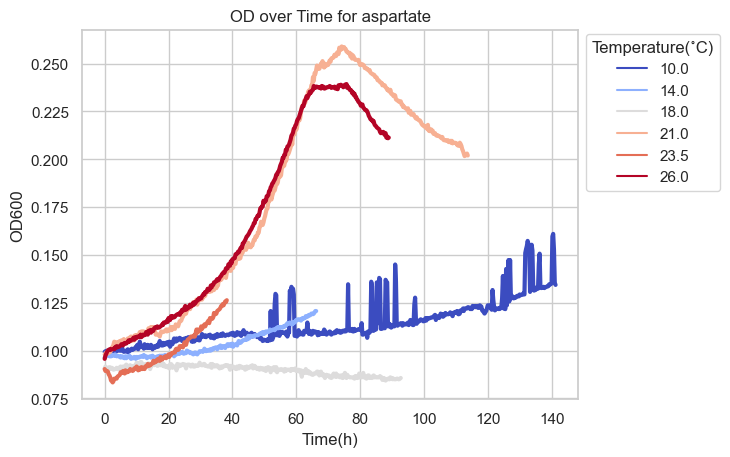

/var/folders/pq/y12h6ypd4750kqt2w5clmhq00000gn/T/ipykernel_56212/2612978463.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.lineplot(data= subset, x='Time (h)',y='OD', hue='Temperature', ci='sd',linewidth=3, palette='coolwarm')


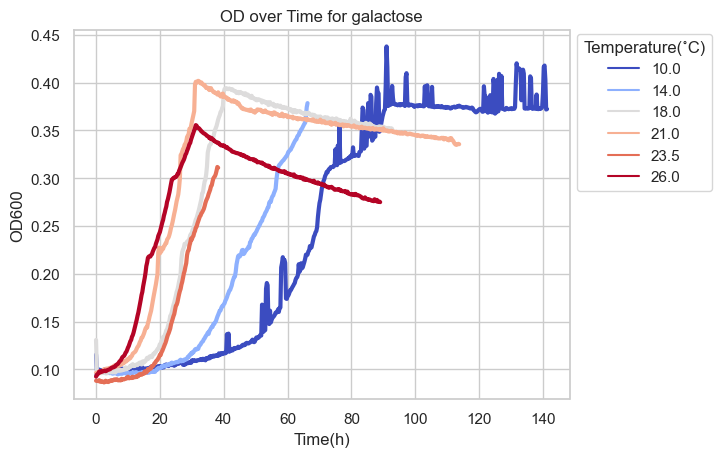

/var/folders/pq/y12h6ypd4750kqt2w5clmhq00000gn/T/ipykernel_56212/2612978463.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.lineplot(data= subset, x='Time (h)',y='OD', hue='Temperature', ci='sd',linewidth=3, palette='coolwarm')


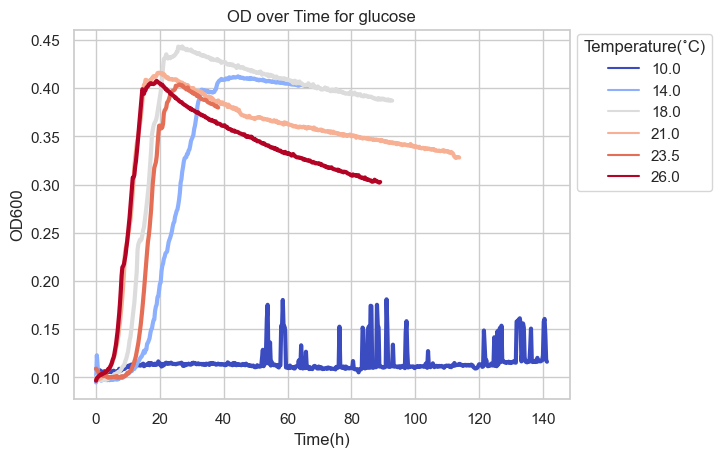

/var/folders/pq/y12h6ypd4750kqt2w5clmhq00000gn/T/ipykernel_56212/2612978463.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.lineplot(data= subset, x='Time (h)',y='OD', hue='Temperature', ci='sd',linewidth=3, palette='coolwarm')


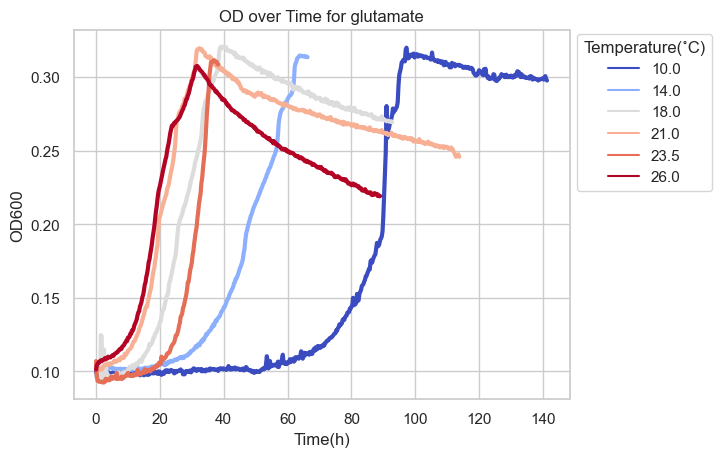

/var/folders/pq/y12h6ypd4750kqt2w5clmhq00000gn/T/ipykernel_56212/2612978463.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.lineplot(data= subset, x='Time (h)',y='OD', hue='Temperature', ci='sd',linewidth=3, palette='coolwarm')


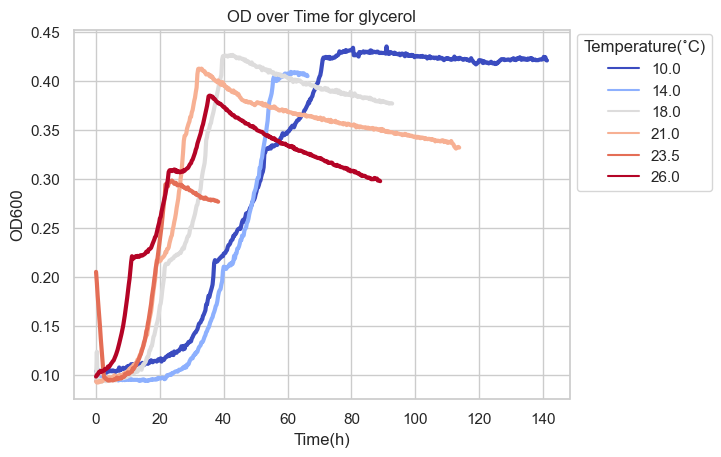

/var/folders/pq/y12h6ypd4750kqt2w5clmhq00000gn/T/ipykernel_56212/2612978463.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.lineplot(data= subset, x='Time (h)',y='OD', hue='Temperature', ci='sd',linewidth=3, palette='coolwarm')


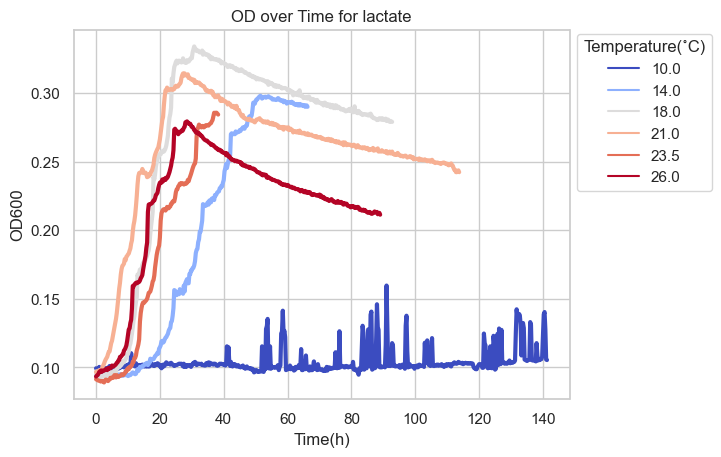

/var/folders/pq/y12h6ypd4750kqt2w5clmhq00000gn/T/ipykernel_56212/2612978463.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.lineplot(data= subset, x='Time (h)',y='OD', hue='Temperature', ci='sd',linewidth=3, palette='coolwarm')


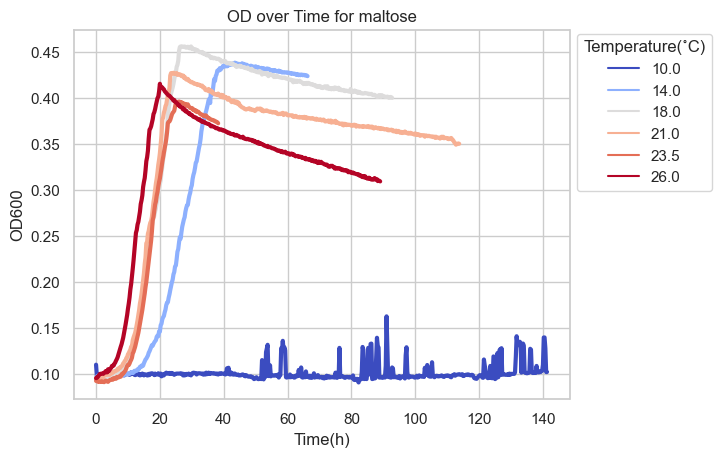

/var/folders/pq/y12h6ypd4750kqt2w5clmhq00000gn/T/ipykernel_56212/2612978463.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.lineplot(data= subset, x='Time (h)',y='OD', hue='Temperature', ci='sd',linewidth=3, palette='coolwarm')


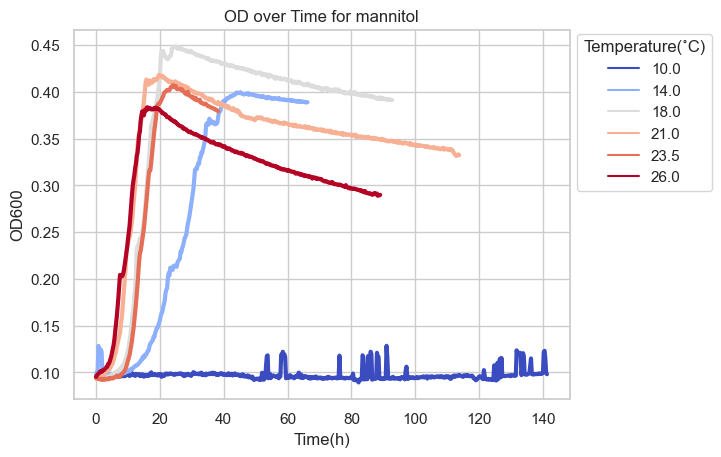

/var/folders/pq/y12h6ypd4750kqt2w5clmhq00000gn/T/ipykernel_56212/2612978463.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.lineplot(data= subset, x='Time (h)',y='OD', hue='Temperature', ci='sd',linewidth=3, palette='coolwarm')


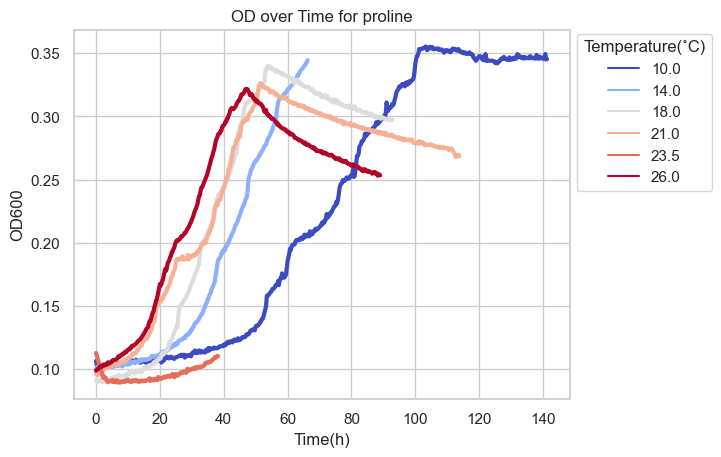

/var/folders/pq/y12h6ypd4750kqt2w5clmhq00000gn/T/ipykernel_56212/2612978463.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.lineplot(data= subset, x='Time (h)',y='OD', hue='Temperature', ci='sd',linewidth=3, palette='coolwarm')


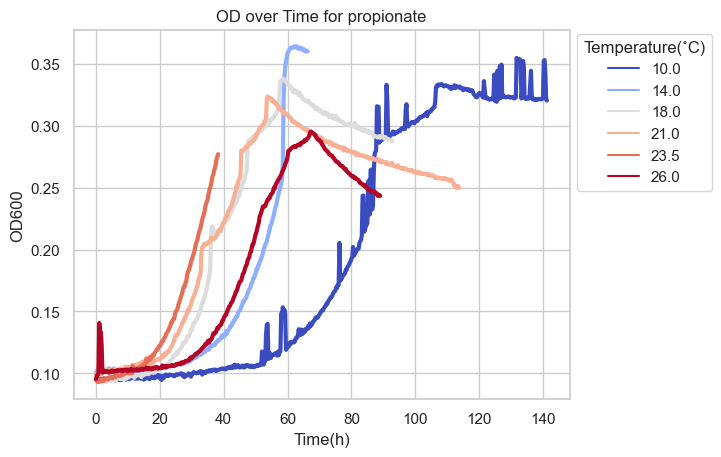

/var/folders/pq/y12h6ypd4750kqt2w5clmhq00000gn/T/ipykernel_56212/2612978463.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.lineplot(data= subset, x='Time (h)',y='OD', hue='Temperature', ci='sd',linewidth=3, palette='coolwarm')


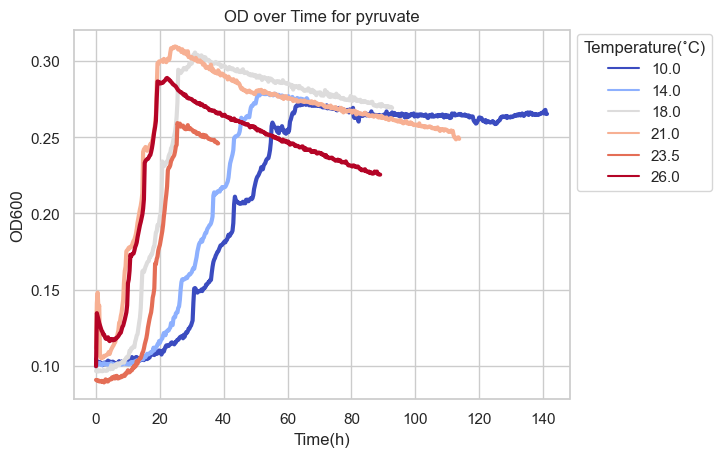

/var/folders/pq/y12h6ypd4750kqt2w5clmhq00000gn/T/ipykernel_56212/2612978463.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.lineplot(data= subset, x='Time (h)',y='OD', hue='Temperature', ci='sd',linewidth=3, palette='coolwarm')


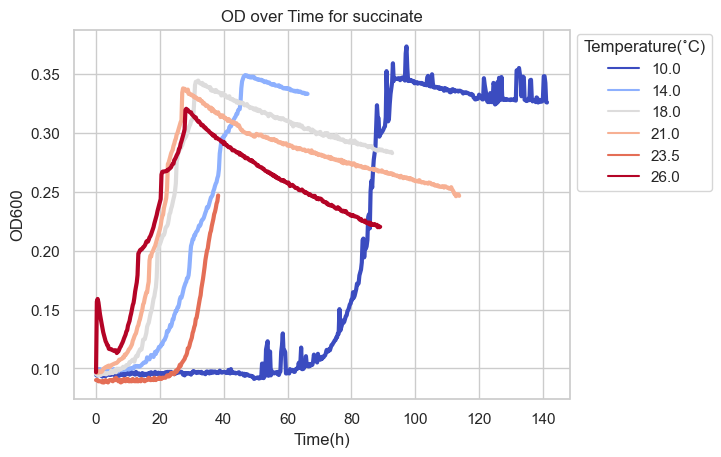

In [13]:
# Group by Temperature, Carbon_Source, and Time (h) and calculate the mean OD
grouped_df = df_long.groupby(['Temperature','Carbon_Source','Time (h)']).agg({'OD':'mean'}).reset_index()
grouped_df
carbon_sources = grouped_df['Carbon_Source'].unique()
# create a separate plot for each carbon source
for carbon_source in carbon_sources:
    subset = grouped_df[grouped_df['Carbon_Source']==carbon_source]
    sns.lineplot(data= subset, x='Time (h)',y='OD', hue='Temperature', ci='sd',linewidth=3, palette='coolwarm')
    # set titles and labels
    plt.title(f'OD over Time for {carbon_source}')
    plt.xlabel('Time(h)')
    plt.ylabel('OD600')
    plt.legend(title='Temperature(˚C)', loc='upper left', bbox_to_anchor=(1,1.01))                                                                  
    plt.show()


In [14]:
print(len(carbon_sources))
print(carbon_sources)

14
['MB' 'acetate' 'aspartate' 'galactose' 'glucose' 'glutamate' 'glycerol'
 'lactate' 'maltose' 'mannitol' 'proline' 'propionate' 'pyruvate'
 'succinate']


4


/var/folders/pq/y12h6ypd4750kqt2w5clmhq00000gn/T/ipykernel_56212/1784839061.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['OD'] = subset['OD']
/var/folders/pq/y12h6ypd4750kqt2w5clmhq00000gn/T/ipykernel_56212/1784839061.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['OD'] = subset['OD']
/var/folders/pq/y12h6ypd4750kqt2w5clmhq00000gn/T/ipykernel_56212/1784839061.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_inde

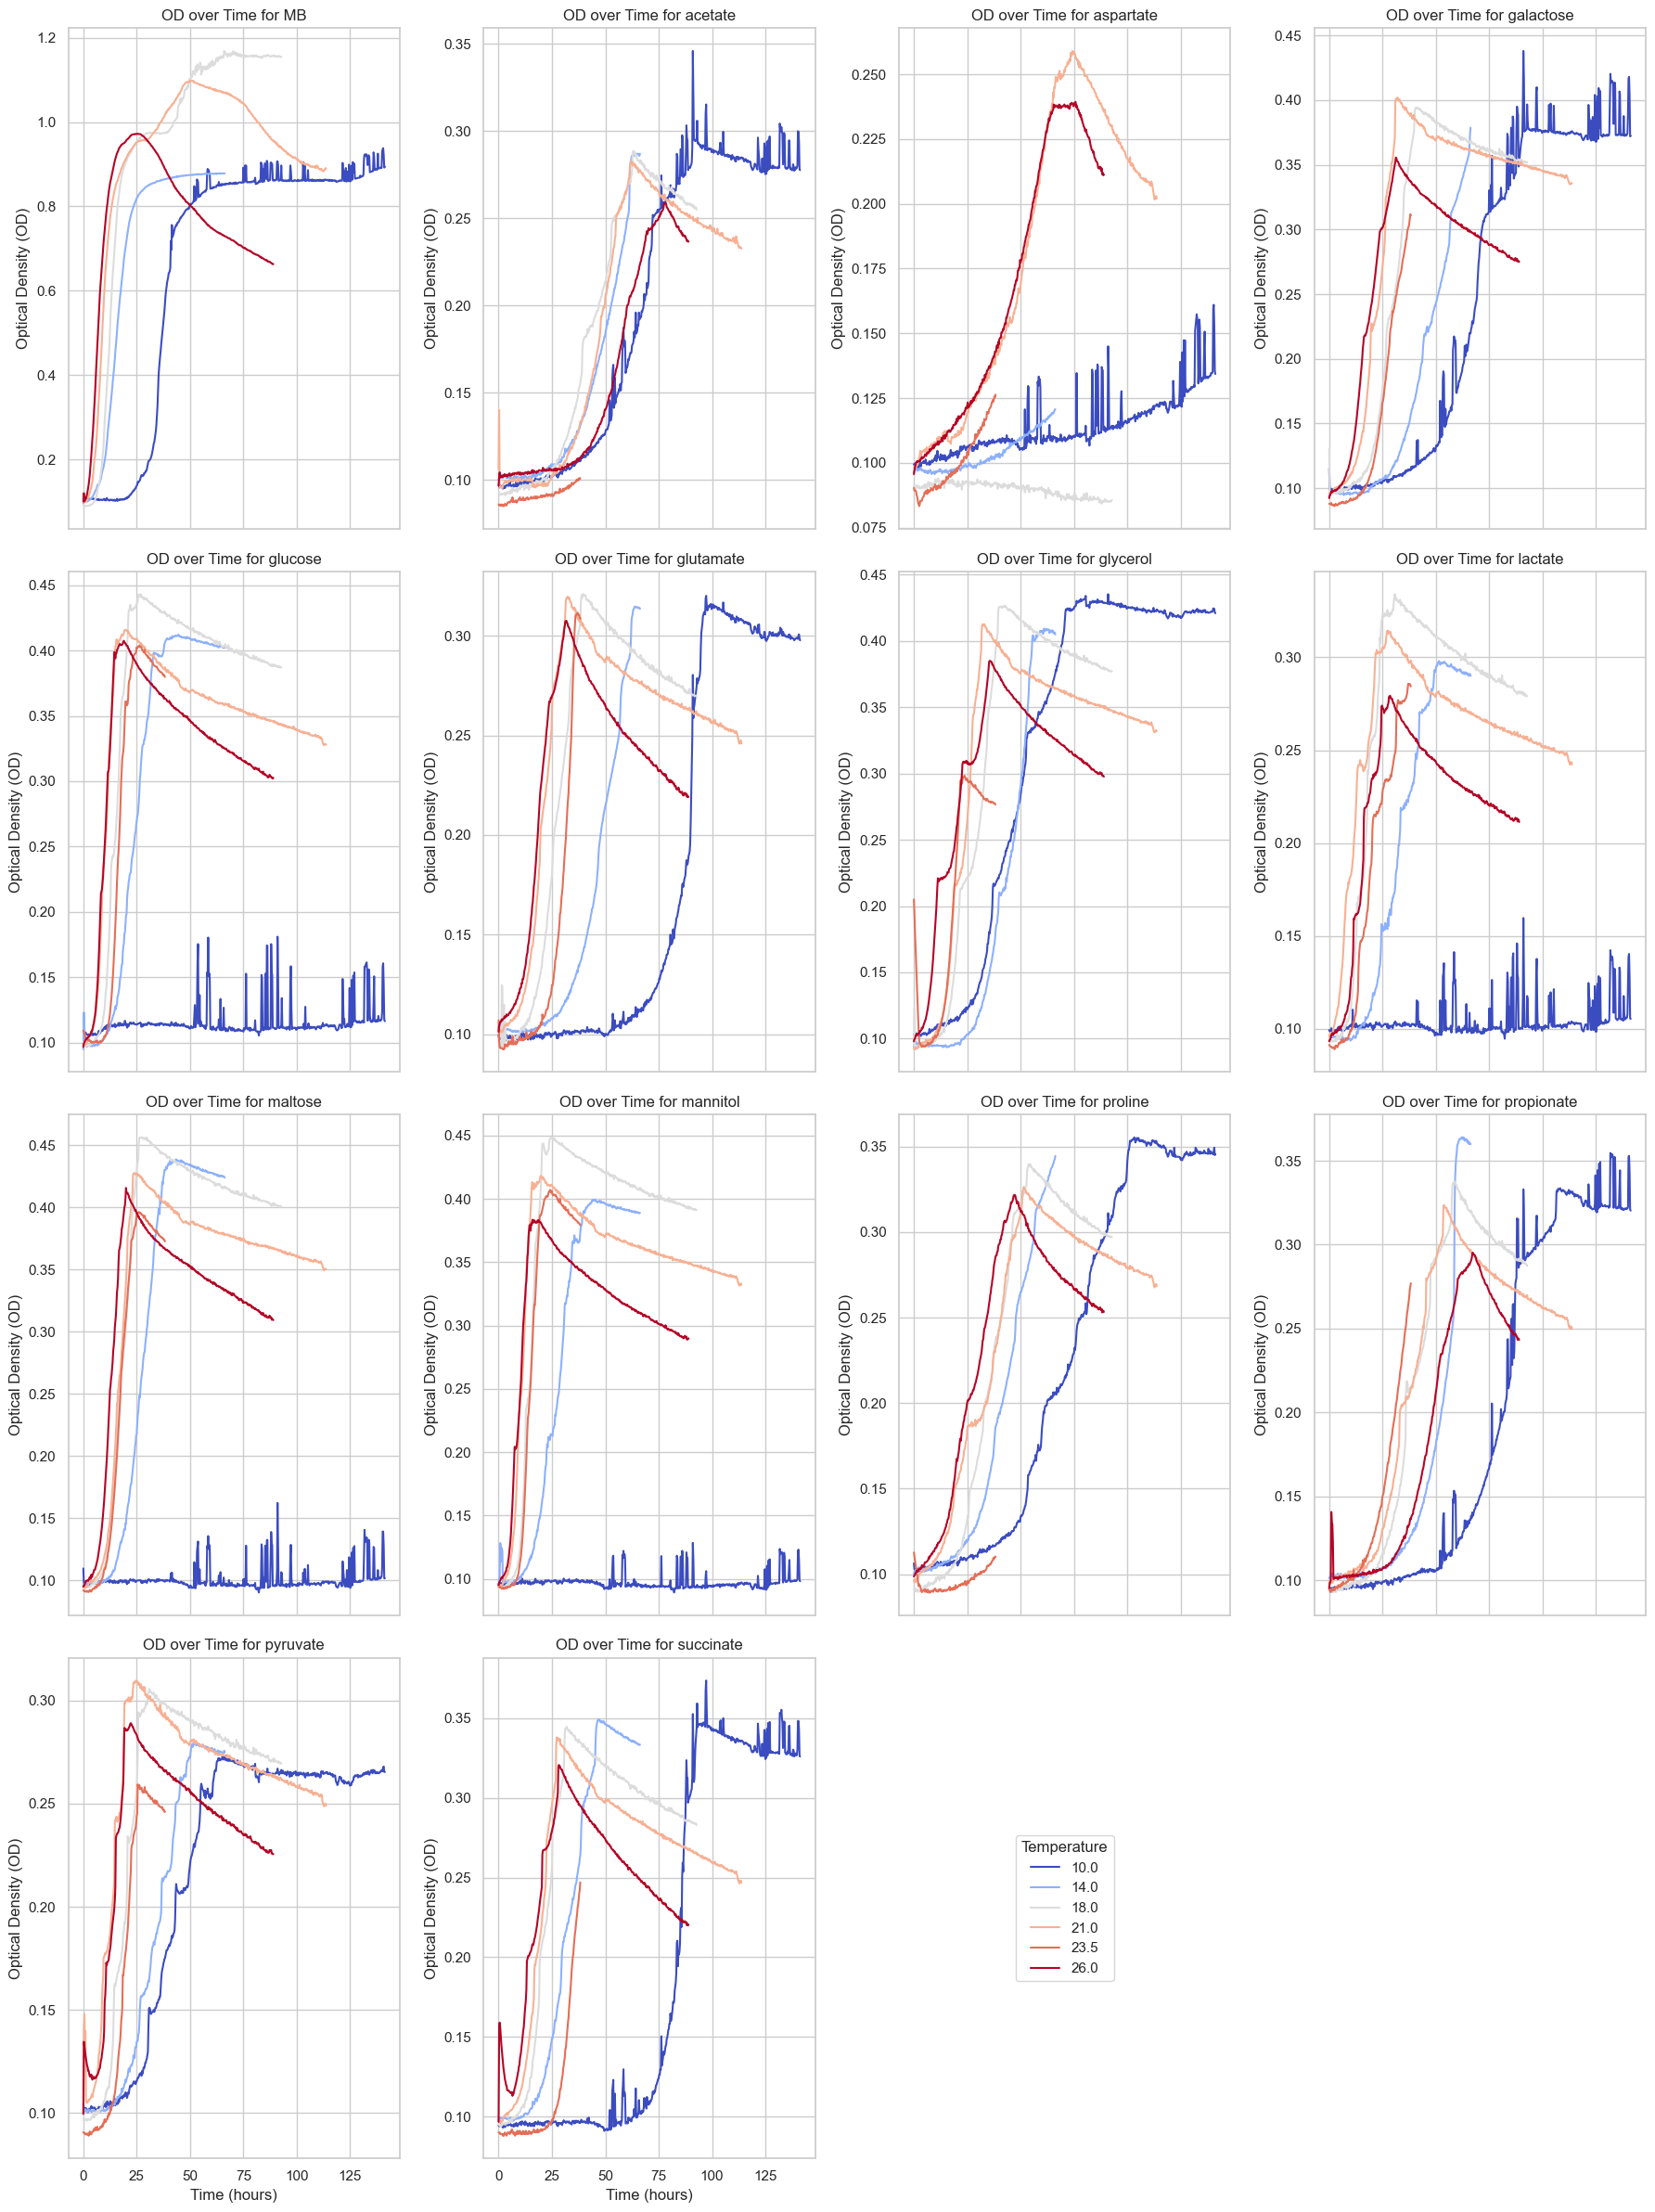

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.backends.backend_pdf import PdfPages

file_path = '/Users/liucheng/Desktop/My_thesis_2024/Plots/plate_reader_6temperatures.pdf'

with PdfPages(file_path) as pdf:

    plots_per_row = 4
    # calculate number of rows needed
    num_rows = (len(carbon_sources)+2)//plots_per_row 
    print(num_rows )
    # create subplots
    fig, axes = plt.subplots(num_rows,plots_per_row,figsize=(18, 6* num_rows), sharex = True, sharey=False)
    axes = axes.flatten()

    handles, labels = None, None

    # loop through each unique carbon source and plot
    for i, carbon_source in enumerate(carbon_sources):
        subset = grouped_df[grouped_df['Carbon_Source'] == carbon_source]
        ax = axes[i]
        # calculate natural logarithm of OD

        subset['OD'] = subset['OD']
        sns.lineplot(ax = ax, data = subset, x='Time (h)',y='OD', hue='Temperature', palette='coolwarm')
        ax.set_title(f'OD over Time for {carbon_source}')
        ax.set_xlabel('Time (hours)')
        ax.set_ylabel('Optical Density (OD)')
        if i==0:  # only add the legend for the first subplot
            handles, labels = ax.get_legend_handles_labels()
        ax.legend().remove()

    if len(carbon_sources) < len(axes):
        empty_ax = axes[len(carbon_sources)]  # select the last subplot
        empty_ax.axis('off')  # turn off axis for empty subplot
        empty_ax.legend(handles=handles, labels=labels, title='Temperature', loc='center')

    #remove extra subplots if not used
    for j in range((len(carbon_sources)+1), len(axes)):
        fig.delaxes(axes[j])
    plt.tight_layout()
    plt.show()
    pdf.savefig(fig)

In [16]:
print(df_long)

        Temperature Carbon_Source     OD  Replicate  Time (h)
0              26.0       glucose  0.092          1      0.00
1              26.0       glucose  0.093          1      0.25
2              26.0       glucose  0.094          1      0.50
3              26.0       glucose  0.097          1      0.75
4              26.0       glucose  0.097          1      1.00
...             ...           ...    ...        ...       ...
138939         10.0      mannitol  0.134          6    140.25
138940         10.0      mannitol  0.132          6    140.50
138941         10.0      mannitol  0.120          6    140.75
138942         10.0      mannitol  0.099          6    141.00
138943         10.0      mannitol  0.098          6    141.25

[138944 rows x 5 columns]


In [17]:
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit, least_squares
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

In [19]:
import numpy as np
import pandas as pd
from scipy.optimize import least_squares
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

class GrowthAnalysis:
    def __init__(self, time_points, OD):
        self.time_points = time_points
        self.OD = OD

    def max_growth_rate(self):
        stop = len(self.time_points) - 20
        mgr = 0
        for idx in range(0, stop):
            ya = self.OD[idx] if idx < len(self.OD) else None
            if ya is None:
                continue
            yb = self.OD[idx + 16] if idx + 20 < len(self.OD) else None
            if yb is None:
                continue
            if ya <= 0:
                ya = 0.001
            if yb <= 0:
                yb = 0.001
            if yb <= ya:
                continue
            gr = (np.log(yb) - np.log(ya)) / (self.time_points[idx + 20] - self.time_points[idx])
            if gr > mgr:
                mgr = gr
            if abs(min(self.OD)-max(self.OD))<0.15:
                mgr = np.nan
        return mgr


def analyze_growth(df_long):
    results = []
    for (temperature, carbon_source, replicate), group in df_long.groupby(['Temperature', 'Carbon_Source', 'Replicate']):
        time_points = group['Time (h)'].values
        OD = group['OD'].values
        growth_analysis = GrowthAnalysis(time_points, OD)
        max_growth_rate = growth_analysis.max_growth_rate()
        results.append({'Temperature': temperature, 'Carbon_Source': carbon_source, 'Replicate': replicate, 'Max_growth_rate': max_growth_rate})
    return pd.DataFrame(results)


In [20]:
results_df = analyze_growth(df_long)
print(results_df)

     Temperature Carbon_Source  Replicate  Max_growth_rate
0           10.0            MB          1         0.000000
1           10.0            MB          2         0.000000
2           10.0            MB          3         0.000000
3           10.0            MB          4         0.000000
4           10.0            MB          5         0.000000
..           ...           ...        ...              ...
367         26.0      pyruvate          5         0.158292
368         26.0      pyruvate          6         0.151203
369         26.0     succinate          1         0.143651
370         26.0     succinate          2         0.141711
371         26.0     succinate          3         0.135666

[372 rows x 4 columns]


In [21]:
df_long['Carbon_Source']

0          glucose
1          glucose
2          glucose
3          glucose
4          glucose
            ...   
138939    mannitol
138940    mannitol
138941    mannitol
138942    mannitol
138943    mannitol
Name: Carbon_Source, Length: 138944, dtype: object

In [22]:
for (temperature, carbon_source,replicate), group in df_long.groupby(['Temperature','Carbon_Source','Replicate']):
    print(group)
    print(group['OD'].values)
    print(len(group['OD'].values))
    print(group['Time (h)'].values)
    break

       Temperature Carbon_Source  OD  Replicate  Time (h)
92787         10.0            MB NaN          1      0.00
92788         10.0            MB NaN          1      0.25
92789         10.0            MB NaN          1      0.50
92790         10.0            MB NaN          1      0.75
92791         10.0            MB NaN          1      1.00
...            ...           ...  ..        ...       ...
93348         10.0            MB NaN          1    140.25
93349         10.0            MB NaN          1    140.50
93350         10.0            MB NaN          1    140.75
93351         10.0            MB NaN          1    141.00
93352         10.0            MB NaN          1    141.25

[566 rows x 5 columns]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan 

In [23]:
combined_df[combined_df['Temperature'] == 10.0 ]['MB1']

1605   NaN
1606   NaN
1607   NaN
1608   NaN
1609   NaN
        ..
2166   NaN
2167   NaN
2168   NaN
2169   NaN
2170   NaN
Name: MB1, Length: 566, dtype: float64

In [24]:
print(results_df)

     Temperature Carbon_Source  Replicate  Max_growth_rate
0           10.0            MB          1         0.000000
1           10.0            MB          2         0.000000
2           10.0            MB          3         0.000000
3           10.0            MB          4         0.000000
4           10.0            MB          5         0.000000
..           ...           ...        ...              ...
367         26.0      pyruvate          5         0.158292
368         26.0      pyruvate          6         0.151203
369         26.0     succinate          1         0.143651
370         26.0     succinate          2         0.141711
371         26.0     succinate          3         0.135666

[372 rows x 4 columns]


In [25]:
results_df.to_csv('/Users/liucheng/Desktop/6temp_without_modeling.csv', index =False)

In [26]:
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [27]:
display_df=pd.read_csv('/Users/liucheng/Desktop/6temp_without_modeling.csv')

In [28]:
display_df

Temperature Carbon_Source  Replicate  Max_growth_rate
0           10.0            MB          1         0.000000
1           10.0            MB          2         0.000000
2           10.0            MB          3         0.000000
3           10.0            MB          4         0.000000
4           10.0            MB          5         0.000000
..           ...           ...        ...              ...
367         26.0      pyruvate          5         0.158292
368         26.0      pyruvate          6         0.151203
369         26.0     succinate          1         0.143651
370         26.0     succinate          2         0.141711
371         26.0     succinate          3         0.135666

[372 rows x 4 columns]

In [29]:
display_df.replace(0, np.nan, inplace=True)
display_df.dropna(inplace=True)
print(display_df)

     Temperature Carbon_Source  Replicate  Max_growth_rate
5           10.0            MB          6         0.151706
6           10.0       acetate          1         0.051566
7           10.0       acetate          2         0.086976
8           10.0       acetate          3         0.079361
12          10.0     galactose          1         0.090269
..           ...           ...        ...              ...
367         26.0      pyruvate          5         0.158292
368         26.0      pyruvate          6         0.151203
369         26.0     succinate          1         0.143651
370         26.0     succinate          2         0.141711
371         26.0     succinate          3         0.135666

[257 rows x 4 columns]


In [30]:
display_df.reset_index(drop=True, inplace=True)

In [31]:
print(display_df)

     Temperature Carbon_Source  Replicate  Max_growth_rate
0           10.0            MB          6         0.151706
1           10.0       acetate          1         0.051566
2           10.0       acetate          2         0.086976
3           10.0       acetate          3         0.079361
4           10.0     galactose          1         0.090269
..           ...           ...        ...              ...
252         26.0      pyruvate          5         0.158292
253         26.0      pyruvate          6         0.151203
254         26.0     succinate          1         0.143651
255         26.0     succinate          2         0.141711
256         26.0     succinate          3         0.135666

[257 rows x 4 columns]


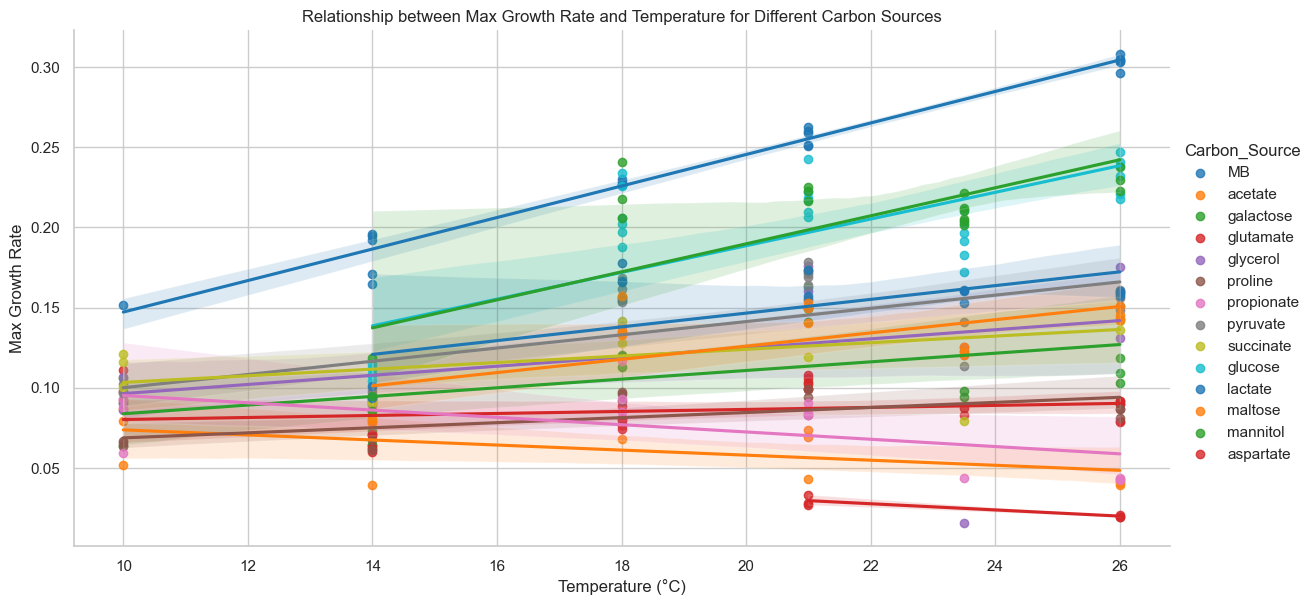

/Users/liucheng/opt/anaconda3/envs/quant/lib/python3.9/site-packages/seaborn/axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/Users/liucheng/opt/anaconda3/envs/quant/lib/python3.9/site-packages/seaborn/axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/Users/liucheng/opt/anaconda3/envs/quant/lib/python3.9/site-packages/seaborn/axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/Users/liucheng/opt/anaconda3/envs/quant/lib/python3.9/site-packages/seaborn/axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/Users/liucheng/opt/anaconda3/envs/quant/lib/python3.9/site-packages/seaborn/axisgrid.py:848: FutureWarning: 

The `

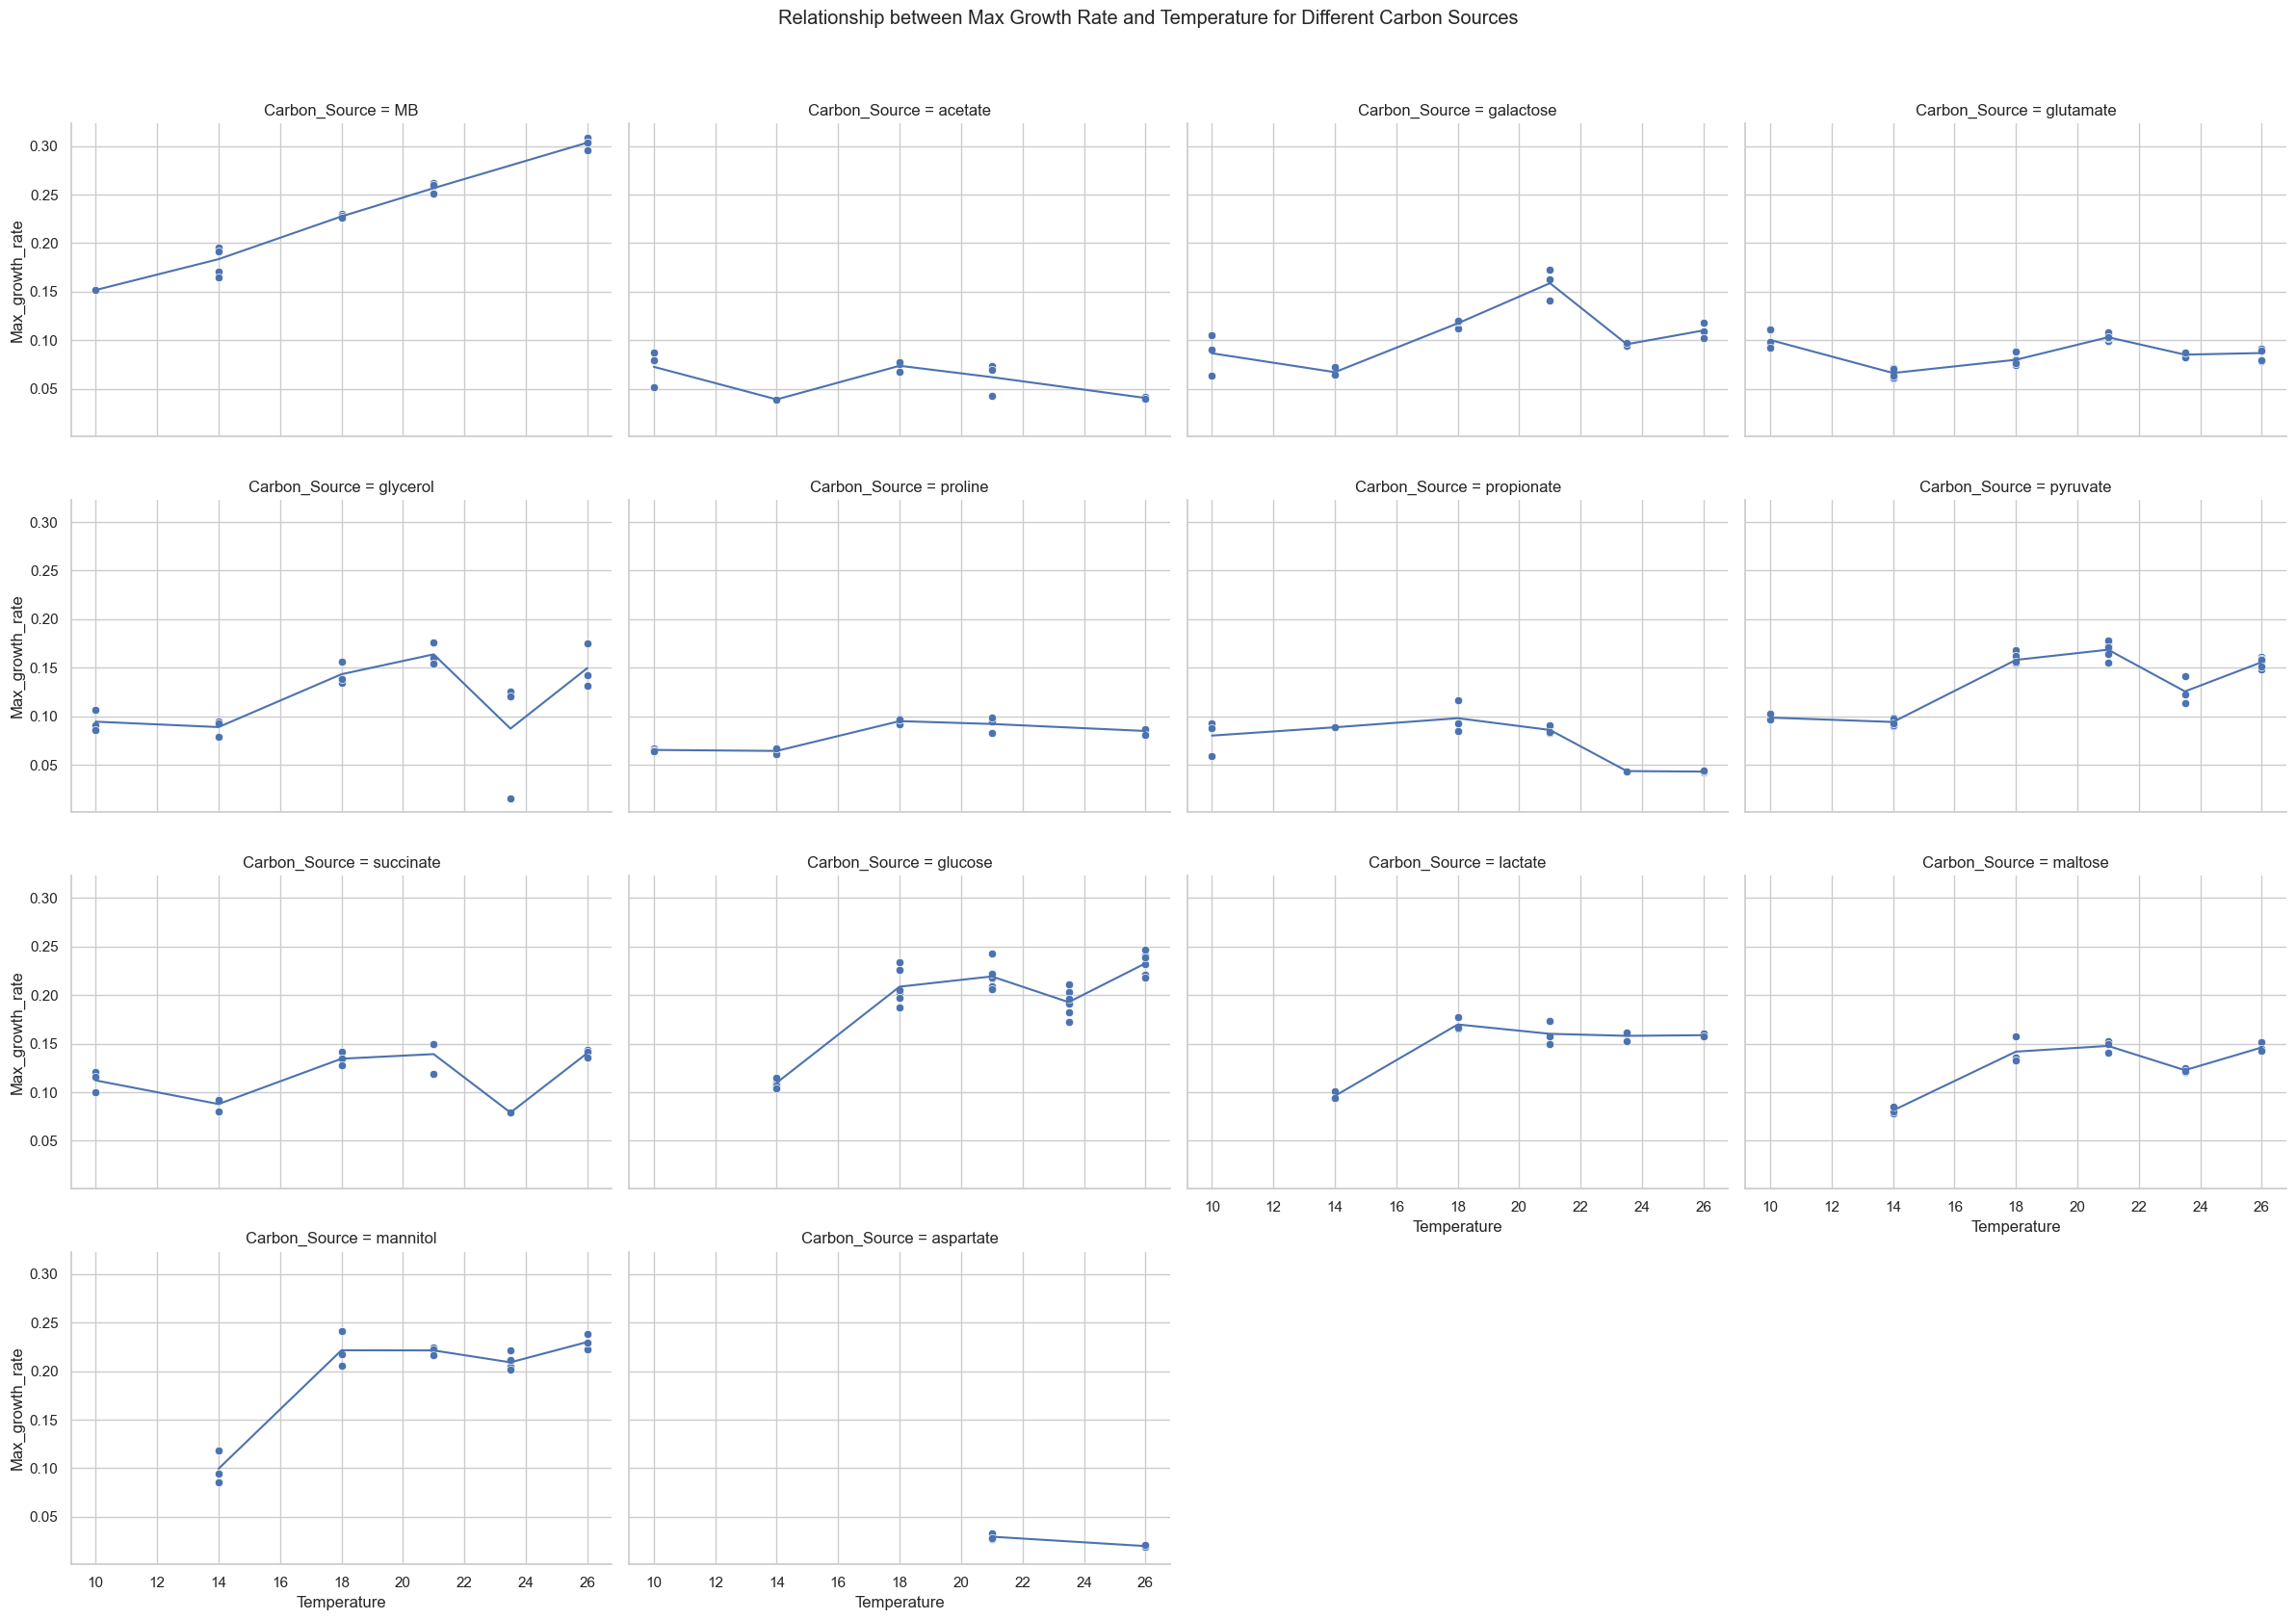

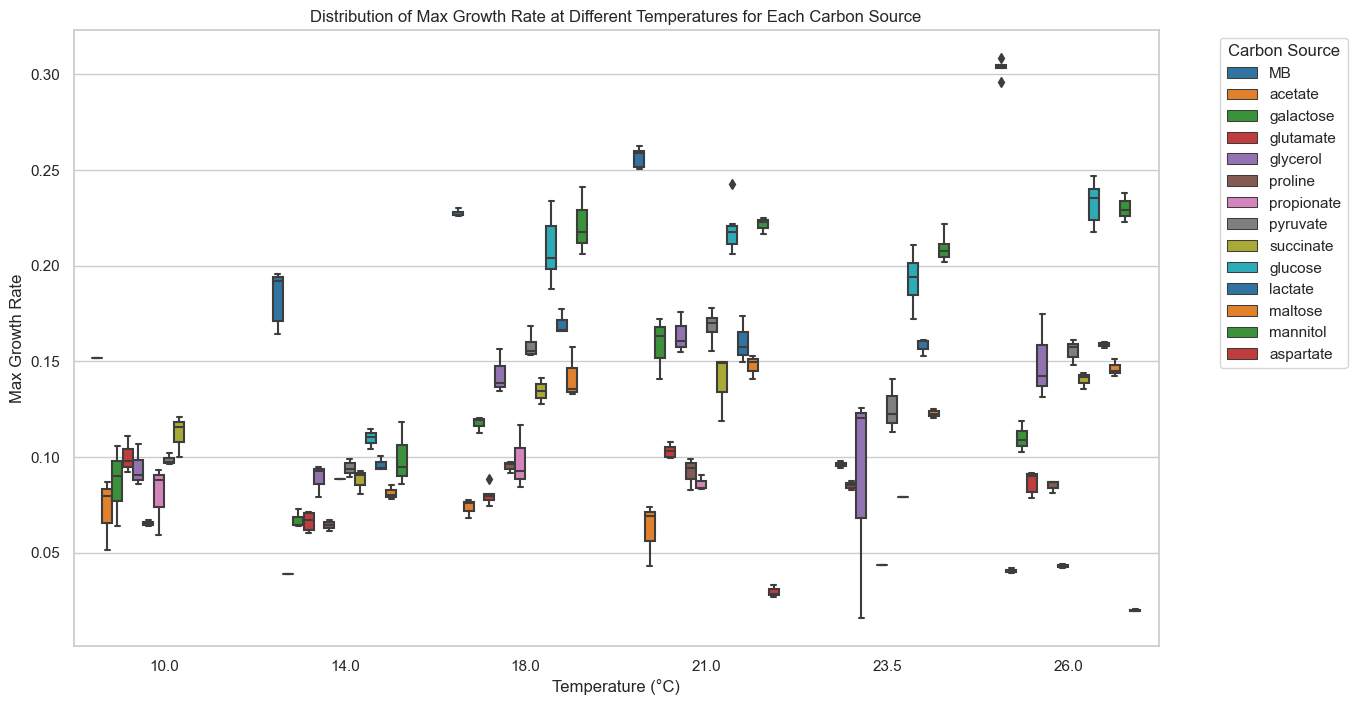

In [32]:
# Scatter Plot with Regression Lines
sns.lmplot(data=display_df, x='Temperature', y='Max_growth_rate', hue='Carbon_Source', aspect=2, height=6, markers='o', palette='tab10')
plt.title('Relationship between Max Growth Rate and Temperature for Different Carbon Sources')
plt.xlabel('Temperature (°C)')
plt.ylabel('Max Growth Rate')
plt.show()

# Facet Grid
g = sns.FacetGrid(display_df, col='Carbon_Source', col_wrap=4, height=4, aspect=1.5)
g.map(sns.scatterplot, 'Temperature', 'Max_growth_rate')
g.map(sns.lineplot, 'Temperature', 'Max_growth_rate', ci=None)
g.fig.suptitle('Relationship between Max Growth Rate and Temperature for Different Carbon Sources', y=1.05)
plt.show()

# Box Plot
plt.figure(figsize=(14, 8))
sns.boxplot(data=display_df, x='Temperature', y='Max_growth_rate', hue='Carbon_Source', palette='tab10')
plt.title('Distribution of Max Growth Rate at Different Temperatures for Each Carbon Source')
plt.xlabel('Temperature (°C)')
plt.ylabel('Max Growth Rate')
plt.legend(title='Carbon Source', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


/Users/liucheng/opt/anaconda3/envs/quant/lib/python3.9/site-packages/seaborn/axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/Users/liucheng/opt/anaconda3/envs/quant/lib/python3.9/site-packages/seaborn/axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/Users/liucheng/opt/anaconda3/envs/quant/lib/python3.9/site-packages/seaborn/axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/Users/liucheng/opt/anaconda3/envs/quant/lib/python3.9/site-packages/seaborn/axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/Users/liucheng/opt/anaconda3/envs/quant/lib/python3.9/site-packages/seaborn/axisgrid.py:848: FutureWarning: 

The `

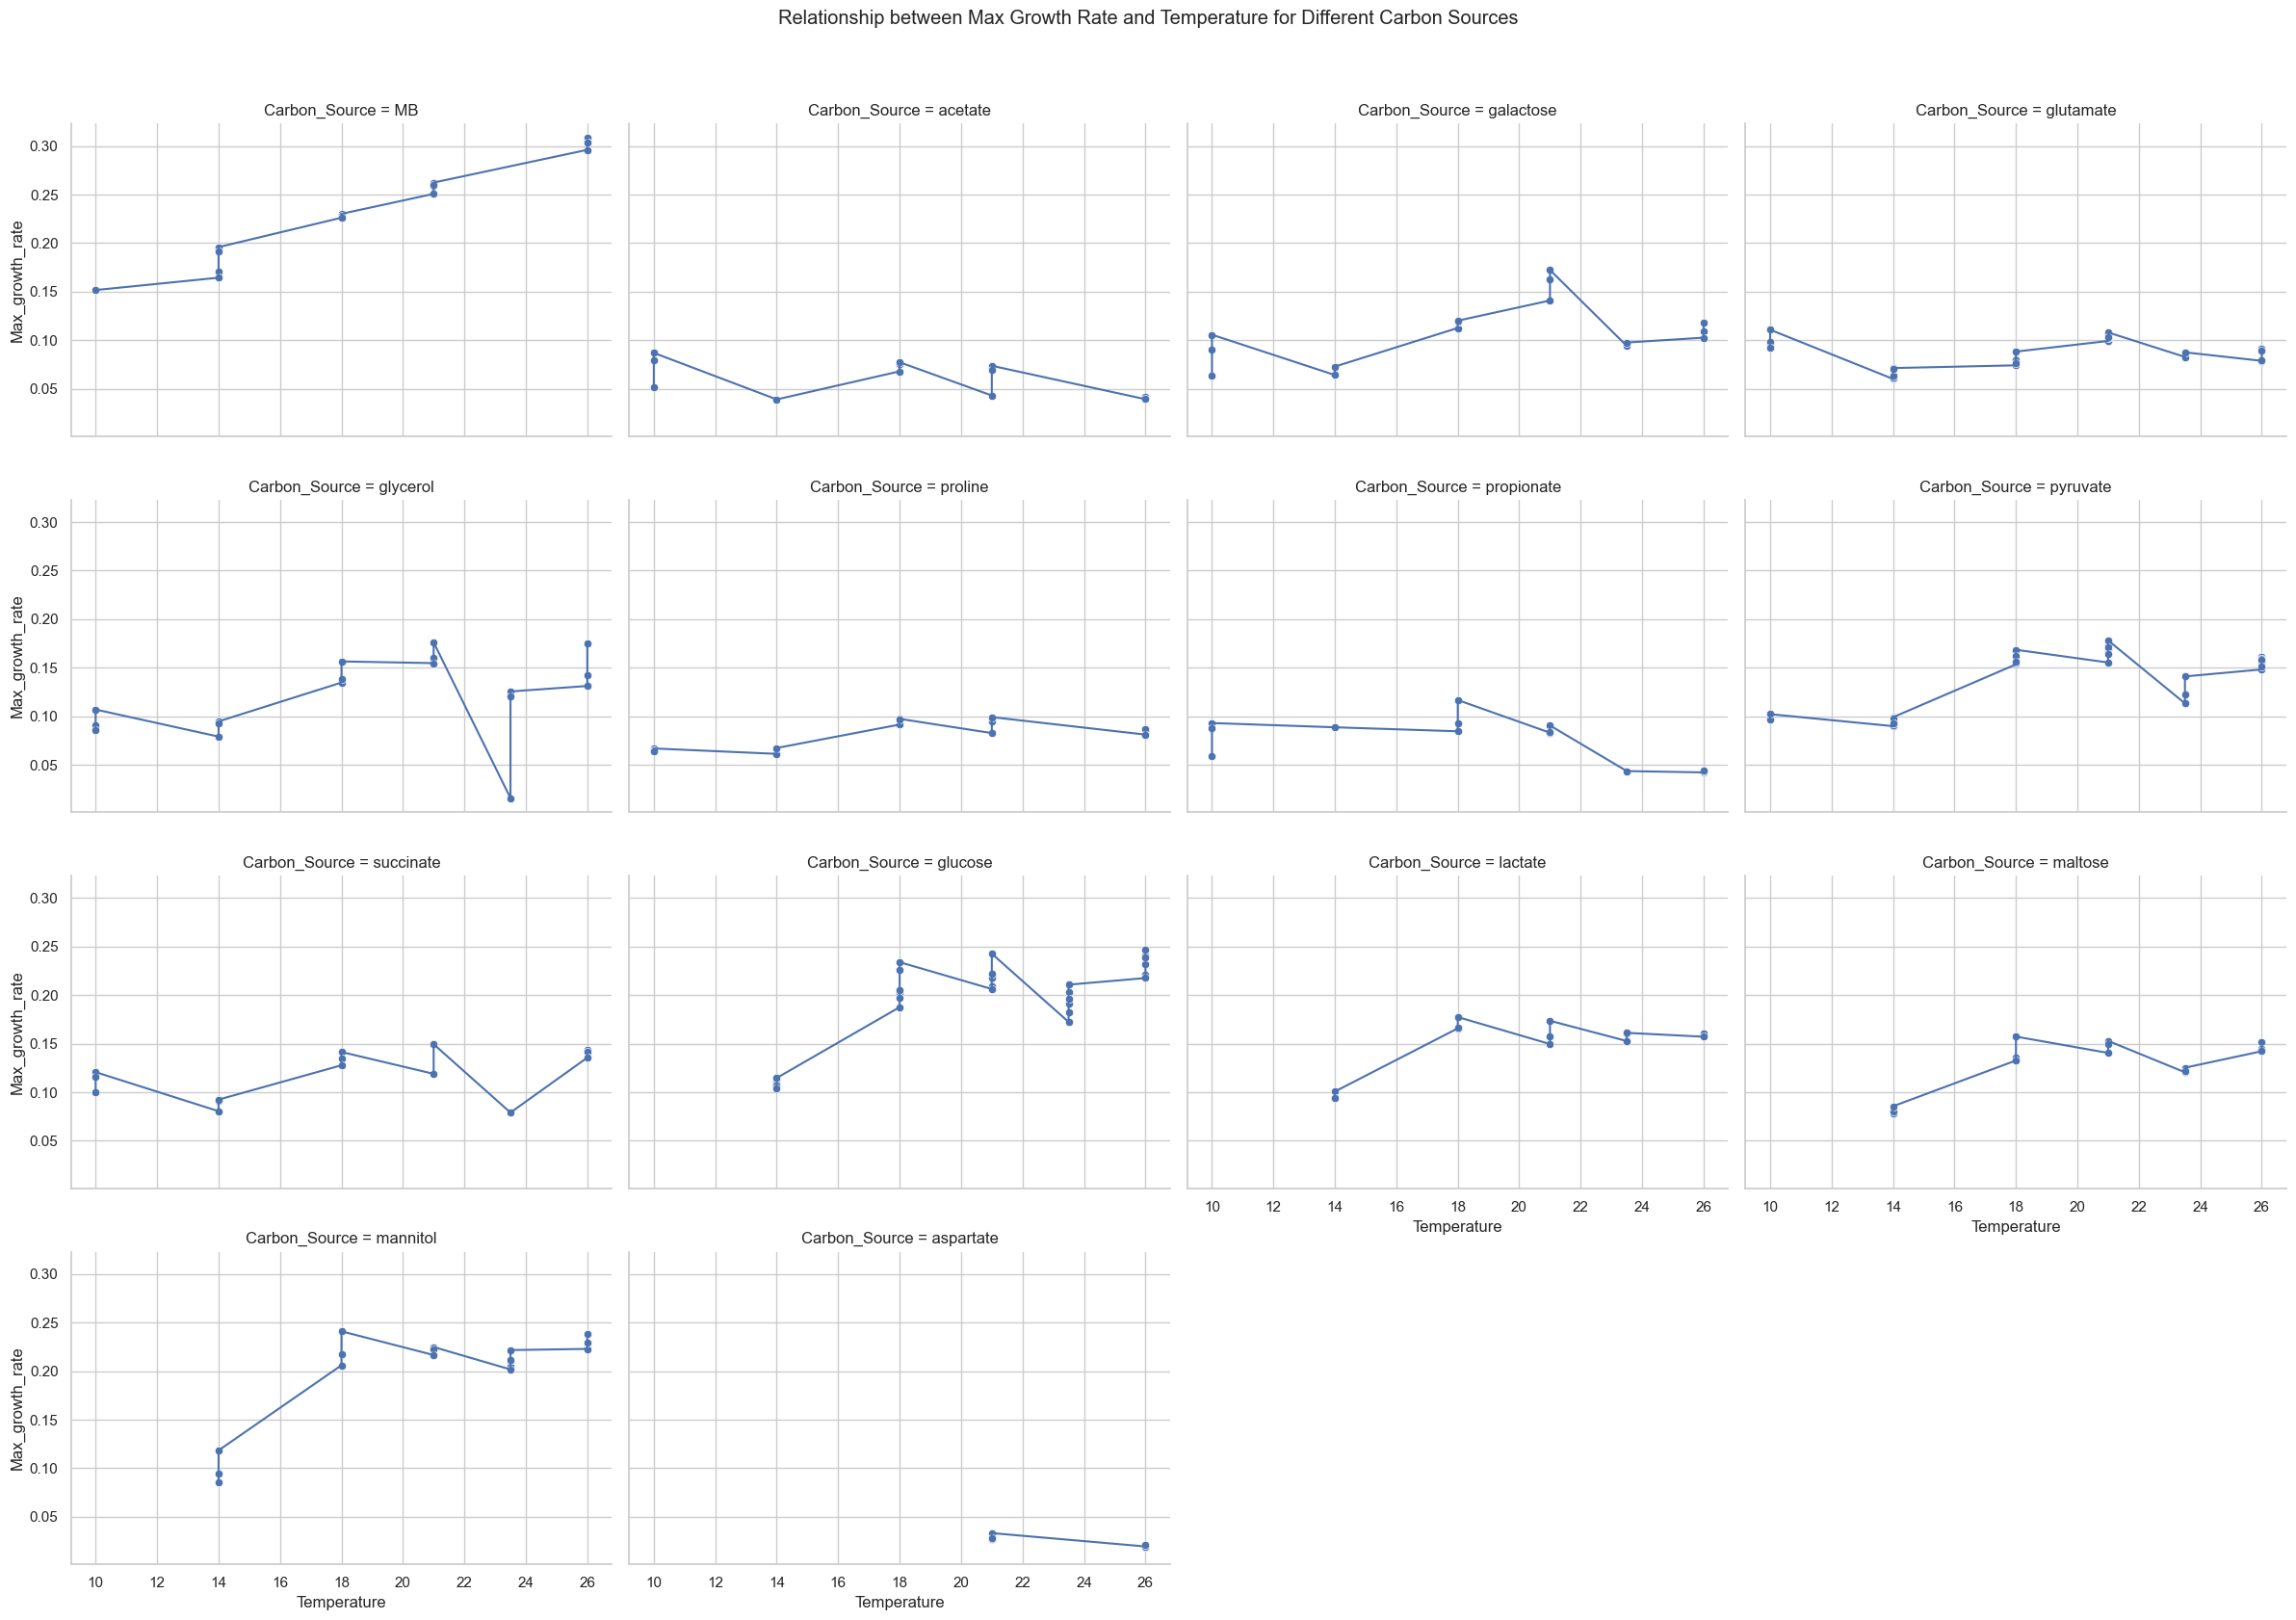

In [33]:


# Create a FacetGrid for separate plots
g = sns.FacetGrid(display_df, col='Carbon_Source', col_wrap=4, height=4, aspect=1.5)
g.map(sns.scatterplot, 'Temperature', 'Max_growth_rate')
g.map(sns.lineplot, 'Temperature', 'Max_growth_rate', ci=None, estimator=None)

# Set the plot title and labels
g.fig.suptitle('Relationship between Max Growth Rate and Temperature for Different Carbon Sources', y=1.05)

# Show the plot
plt.show()


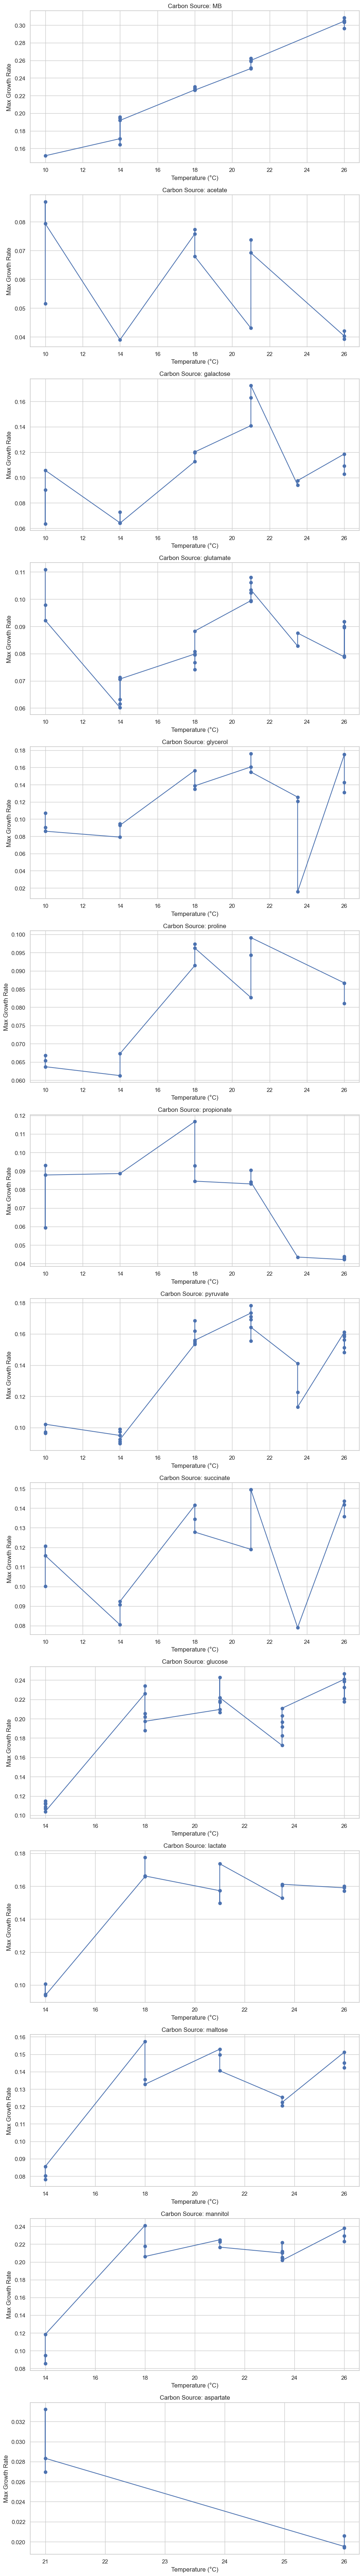

In [34]:

# Get the unique carbon sources
carbon_sources = display_df['Carbon_Source'].unique()

# Create subplots for each carbon source
fig, axes = plt.subplots(nrows=len(carbon_sources), ncols=1, figsize=(10, 5 * len(carbon_sources)))

# Iterate through each carbon source and plot
for ax, carbon_source in zip(axes, carbon_sources):
    subset = display_df[display_df['Carbon_Source'] == carbon_source]
    ax.scatter(subset['Temperature'], subset['Max_growth_rate'])
    ax.plot(subset['Temperature'], subset['Max_growth_rate'])
    ax.set_title(f'Carbon Source: {carbon_source}')
    ax.set_xlabel('Temperature (°C)')
    ax.set_ylabel('Max Growth Rate')

# Adjust layout
plt.tight_layout()
plt.show()


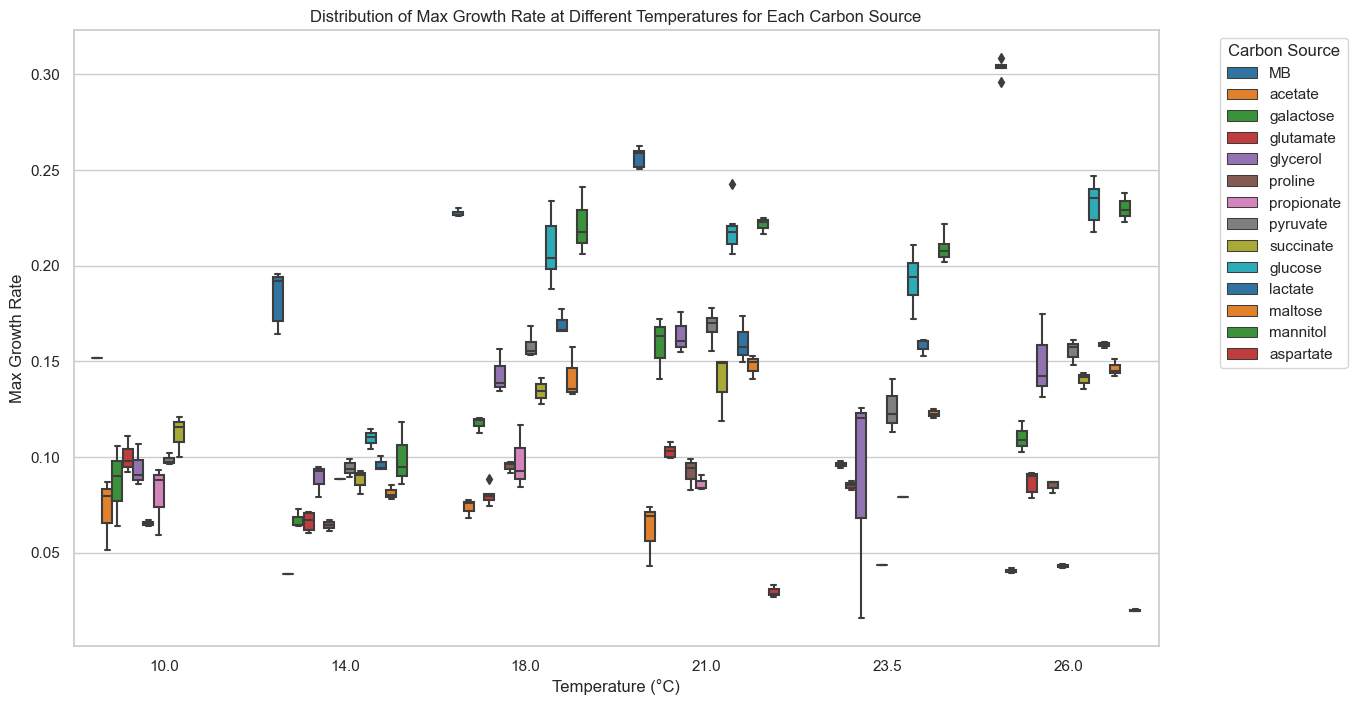

In [35]:
 # Sample DataFrame

# Create the box plot
plt.figure(figsize=(14, 8))
sns.boxplot(data=display_df, x='Temperature', y='Max_growth_rate', hue='Carbon_Source', palette='tab10')

# Set the plot title and labels
plt.title('Distribution of Max Growth Rate at Different Temperatures for Each Carbon Source')
plt.xlabel('Temperature (°C)')
plt.ylabel('Max Growth Rate')

# Show the plot
plt.legend(title='Carbon Source', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


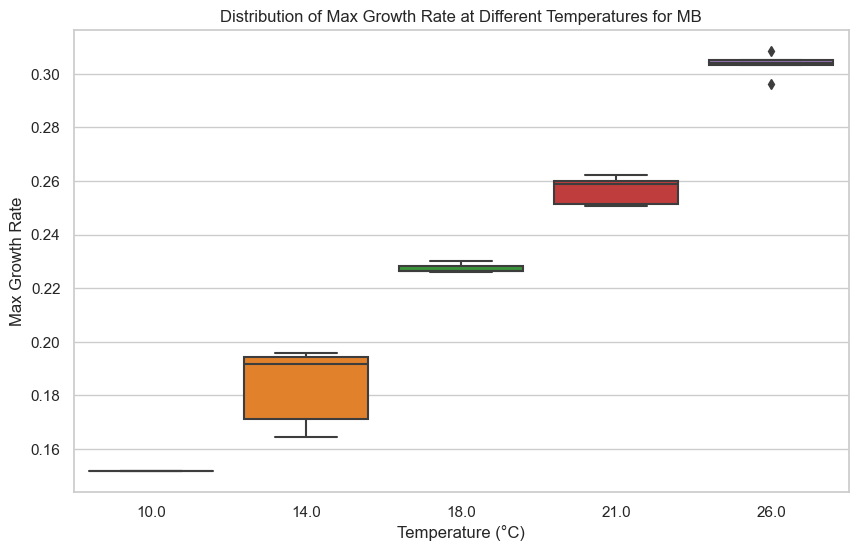

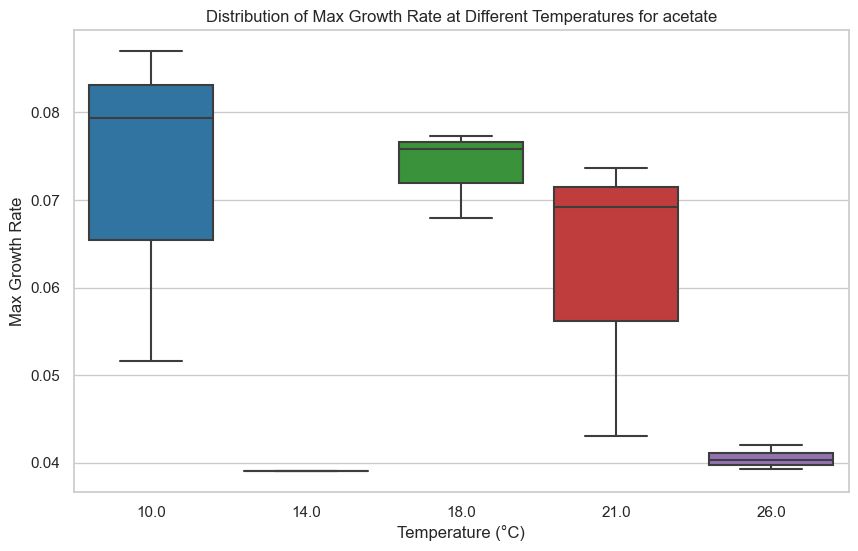

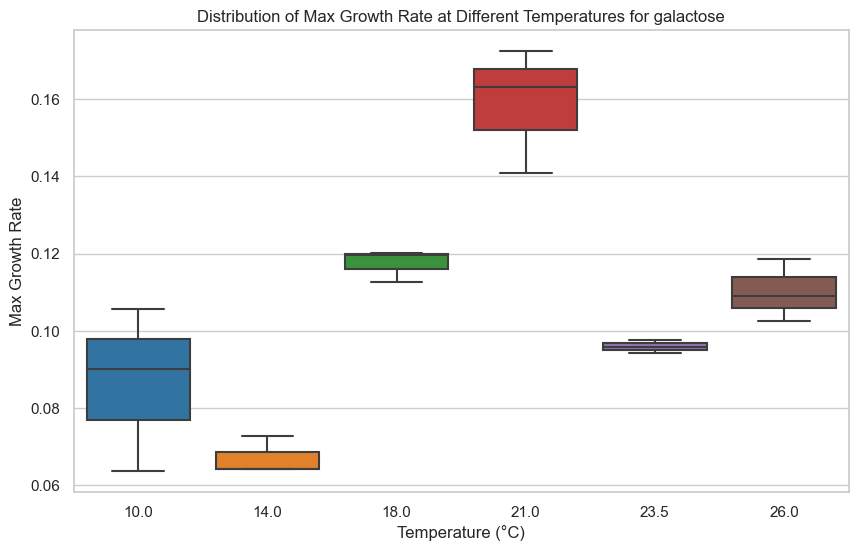

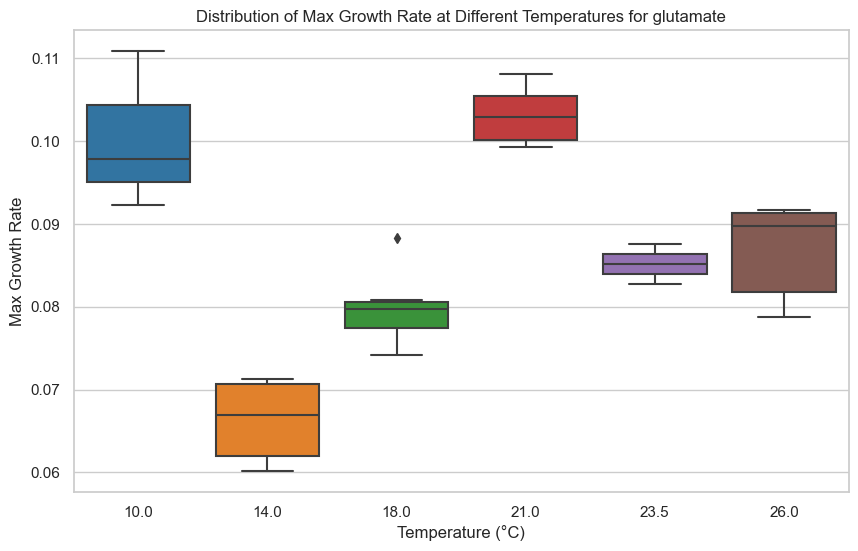

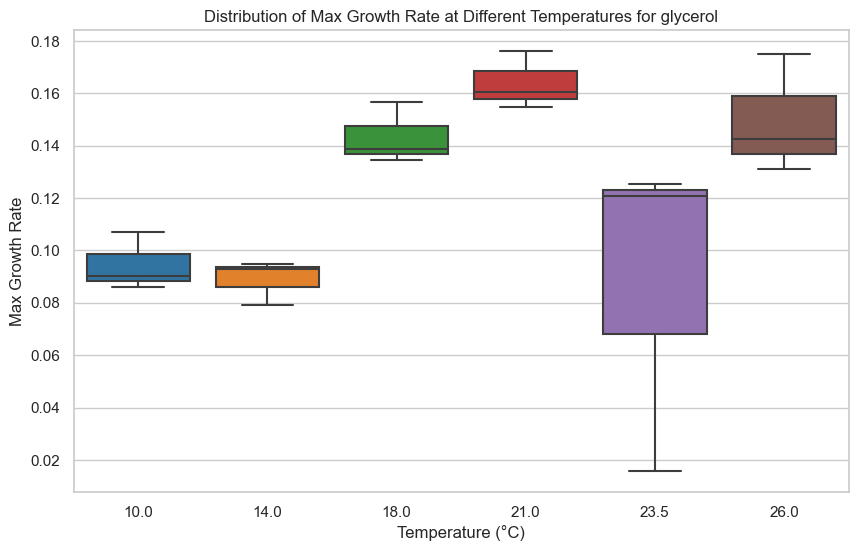

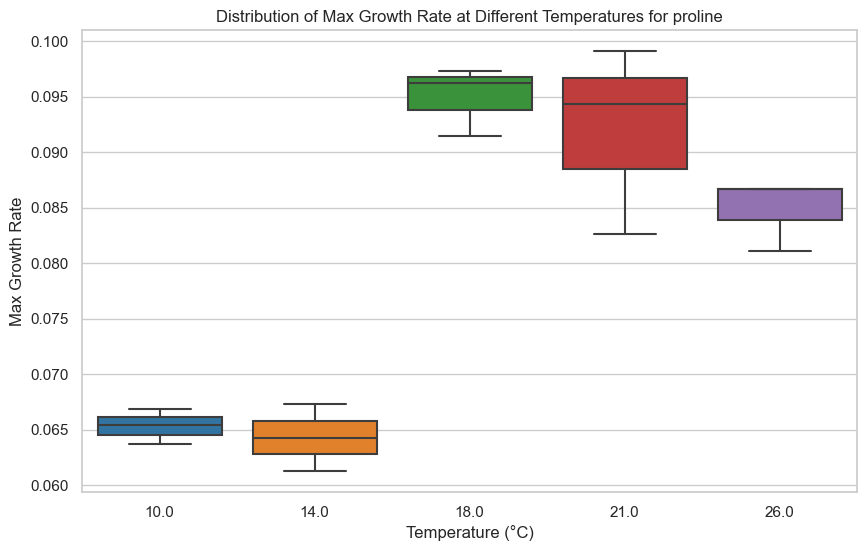

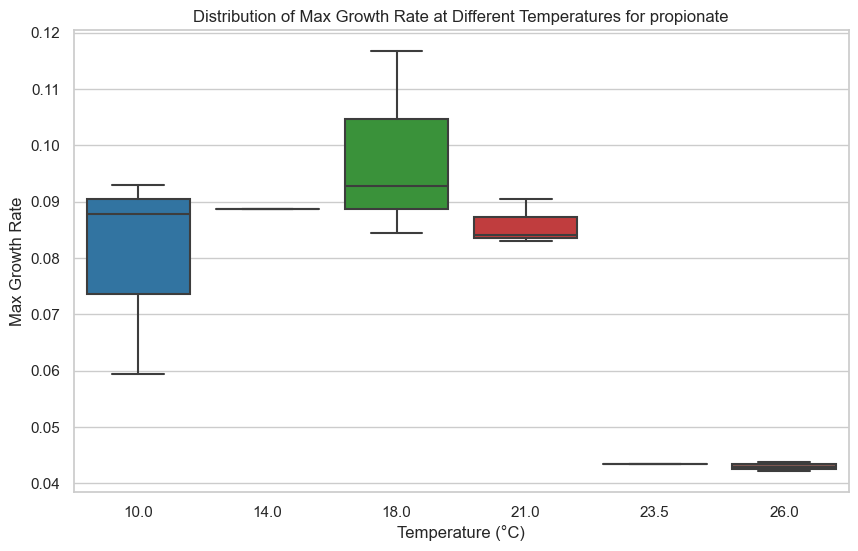

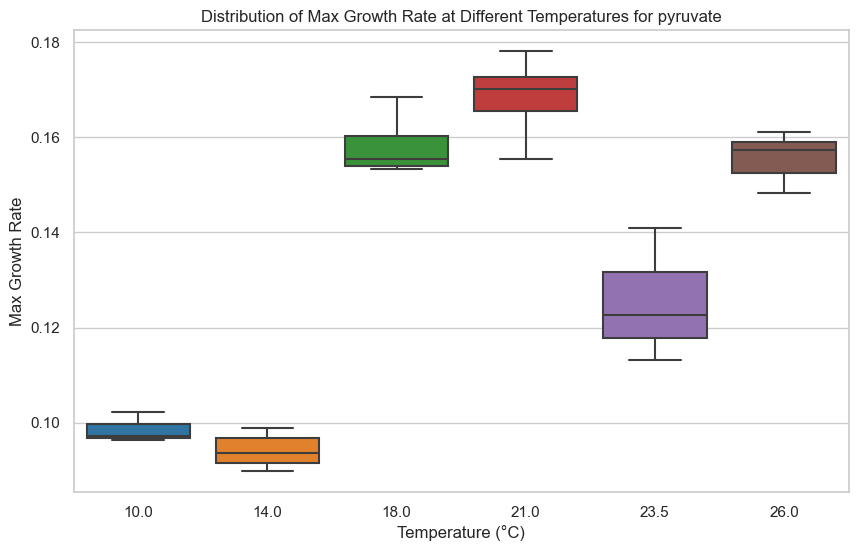

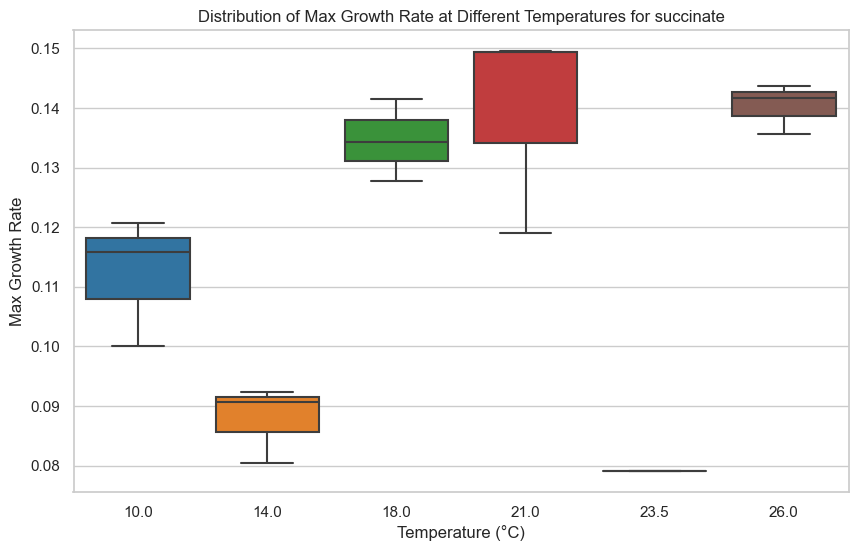

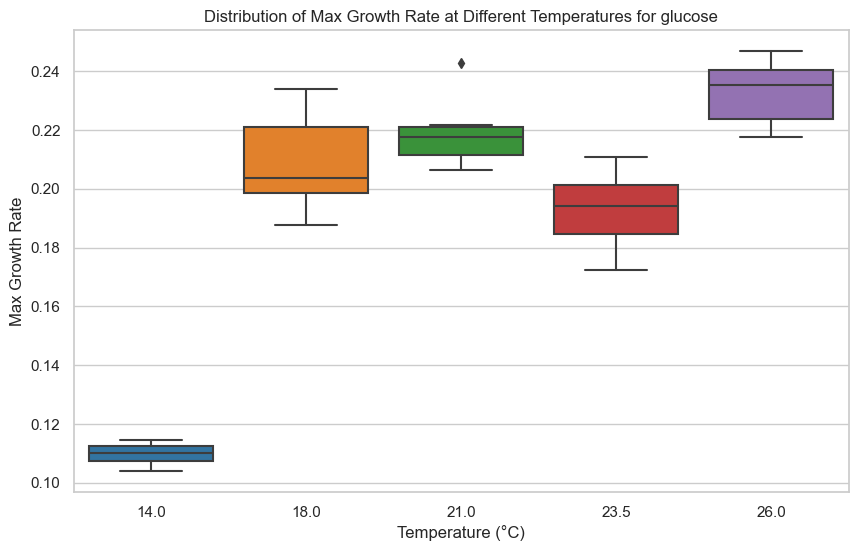

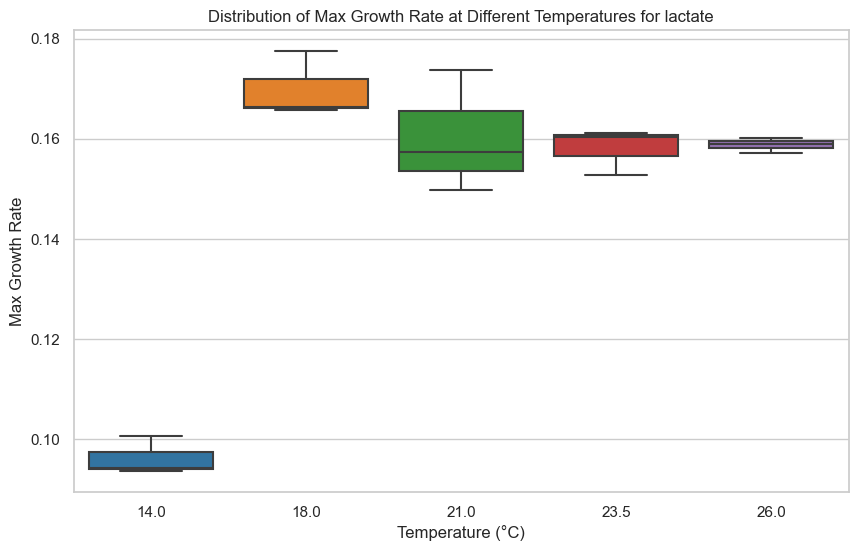

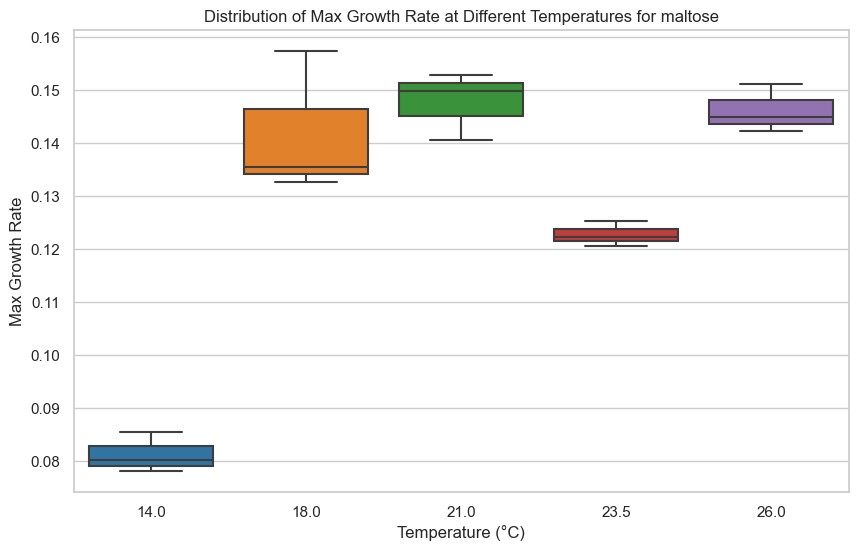

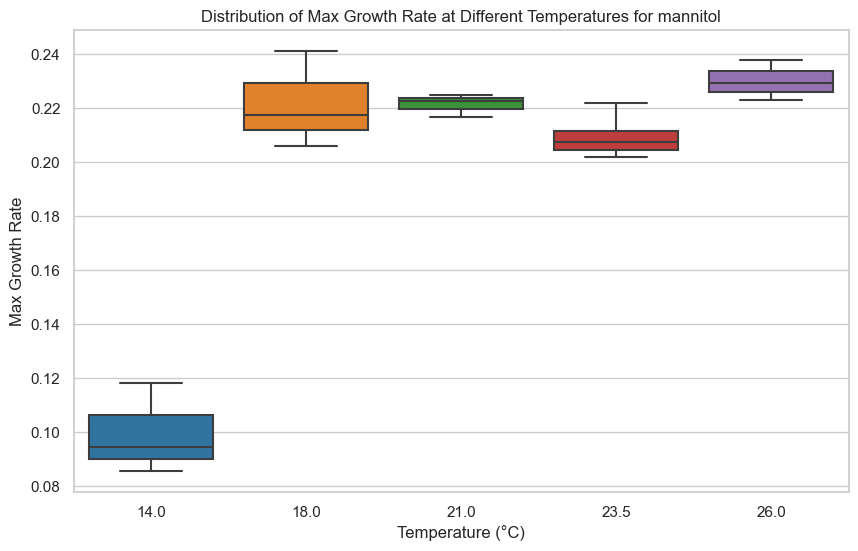

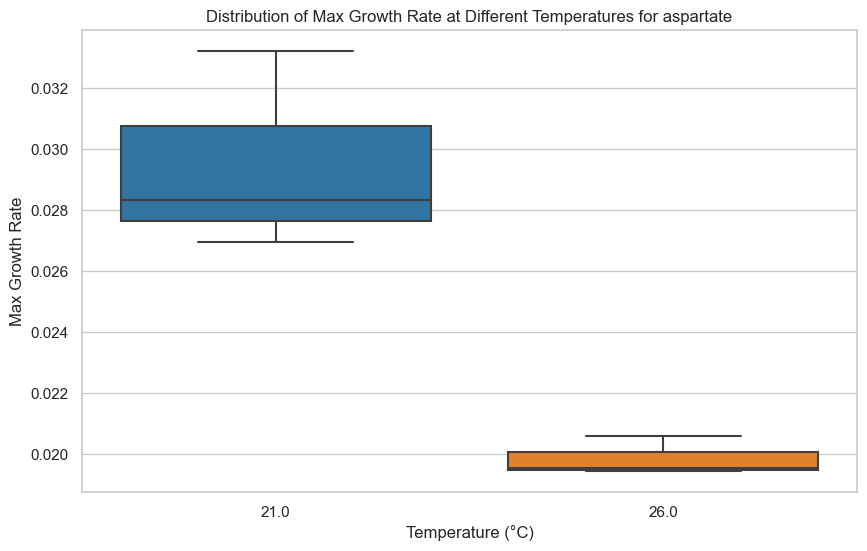

In [36]:
# Sample DataFrame

# Get the unique carbon sources
carbon_sources = display_df['Carbon_Source'].unique()

# Create a separate plot for each carbon source
for carbon_source in carbon_sources:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=display_df[display_df['Carbon_Source'] == carbon_source], x='Temperature', y='Max_growth_rate', palette='tab10')
    
    # Set the plot title and labels
    plt.title(f'Distribution of Max Growth Rate at Different Temperatures for {carbon_source}')
    plt.xlabel('Temperature (°C)')
    plt.ylabel('Max Growth Rate')
    
    # Show the plot
    plt.show()


    Temperature Carbon_Source  Max_growth_rate
0          10.0            MB         0.151706
1          10.0       acetate         0.072634
2          10.0     galactose         0.086558
3          10.0     glutamate         0.100292
4          10.0      glycerol         0.094415
..          ...           ...              ...
68         26.0      mannitol         0.230078
69         26.0       proline         0.084807
70         26.0    propionate         0.042978
71         26.0      pyruvate         0.155747
72         26.0     succinate         0.140343

[73 rows x 3 columns]


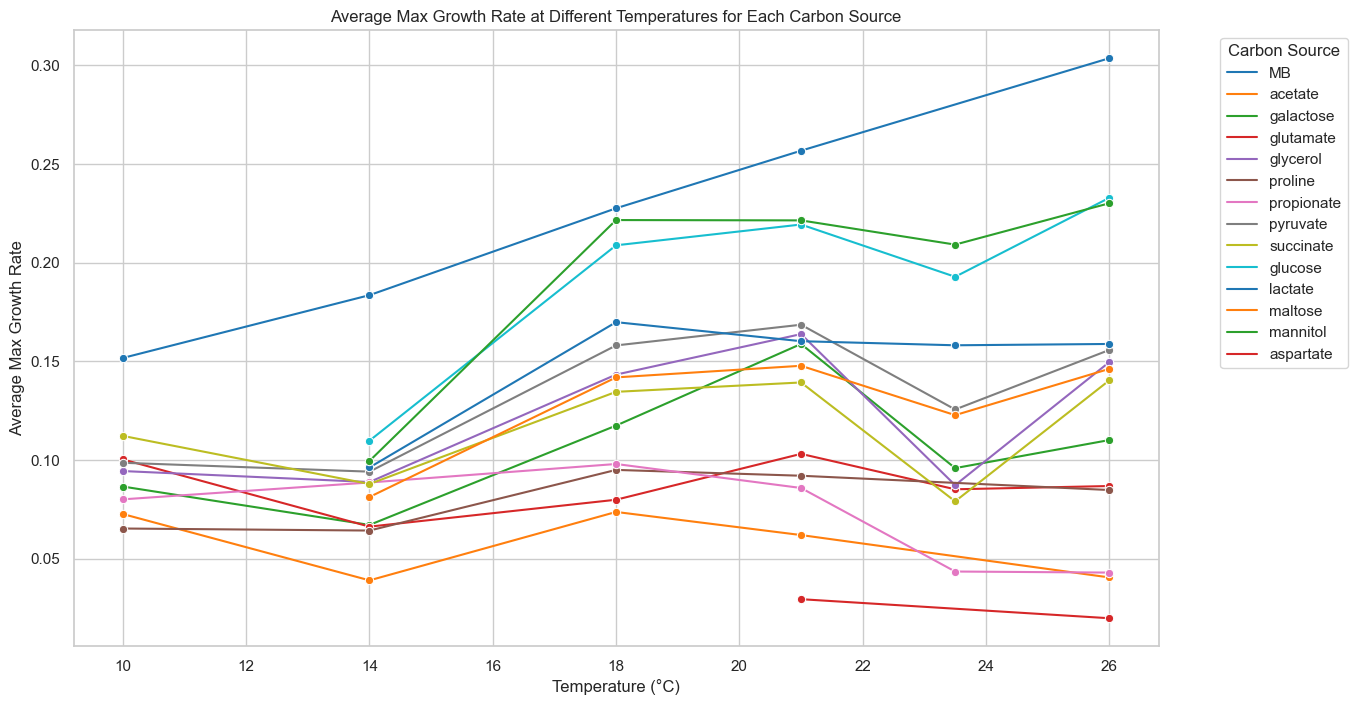

In [37]:
# Group by Temperature and Carbon_Source and calculate mean Max_growth_rate
grouped_df = display_df.groupby(['Temperature', 'Carbon_Source']).agg({'Max_growth_rate': 'mean'}).reset_index()

# Print the grouped DataFrame
print(grouped_df)

# Create the line plot
plt.figure(figsize=(14, 8))
sns.lineplot(data=grouped_df, x='Temperature', y='Max_growth_rate', hue='Carbon_Source', marker='o', palette='tab10')

# Set the plot title and labels
plt.title('Average Max Growth Rate at Different Temperatures for Each Carbon Source')
plt.xlabel('Temperature (°C)')
plt.ylabel('Average Max Growth Rate')

# Show the plot
plt.legend(title='Carbon Source', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

/var/folders/pq/y12h6ypd4750kqt2w5clmhq00000gn/T/ipykernel_56212/2043271478.py:14: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=grouped_df, x='Temperature', y='Max_growth_rate', marker='o', palette='tab10')


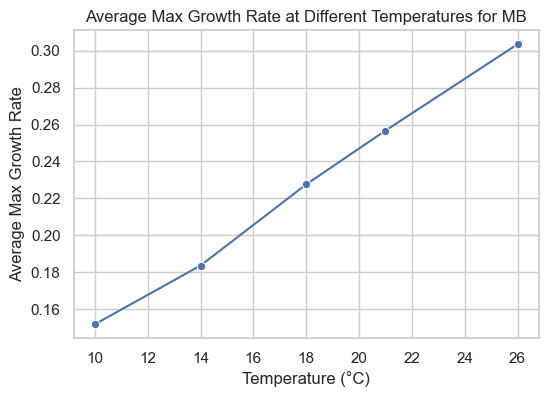

/var/folders/pq/y12h6ypd4750kqt2w5clmhq00000gn/T/ipykernel_56212/2043271478.py:14: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=grouped_df, x='Temperature', y='Max_growth_rate', marker='o', palette='tab10')


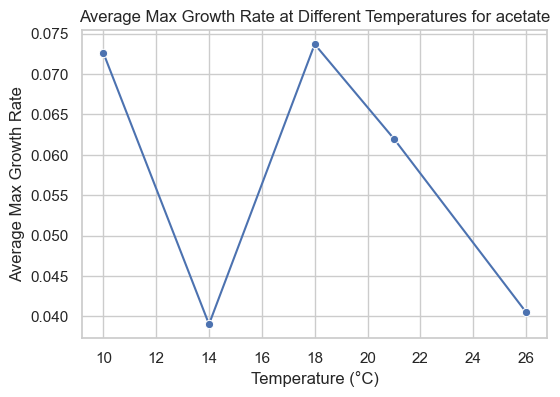

/var/folders/pq/y12h6ypd4750kqt2w5clmhq00000gn/T/ipykernel_56212/2043271478.py:14: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=grouped_df, x='Temperature', y='Max_growth_rate', marker='o', palette='tab10')


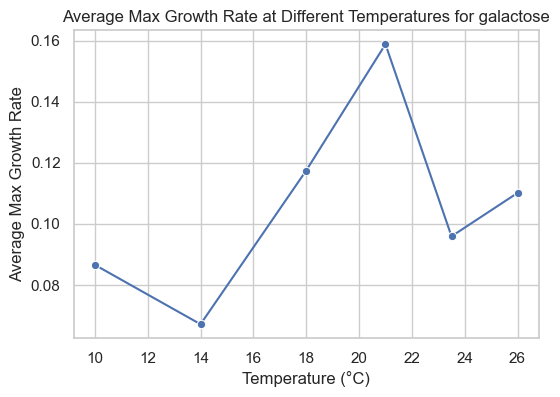

/var/folders/pq/y12h6ypd4750kqt2w5clmhq00000gn/T/ipykernel_56212/2043271478.py:14: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=grouped_df, x='Temperature', y='Max_growth_rate', marker='o', palette='tab10')


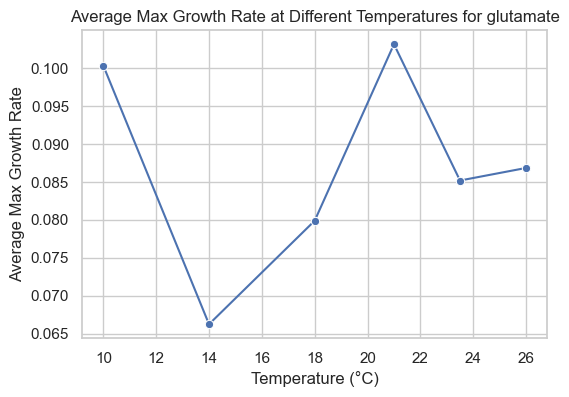

/var/folders/pq/y12h6ypd4750kqt2w5clmhq00000gn/T/ipykernel_56212/2043271478.py:14: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=grouped_df, x='Temperature', y='Max_growth_rate', marker='o', palette='tab10')


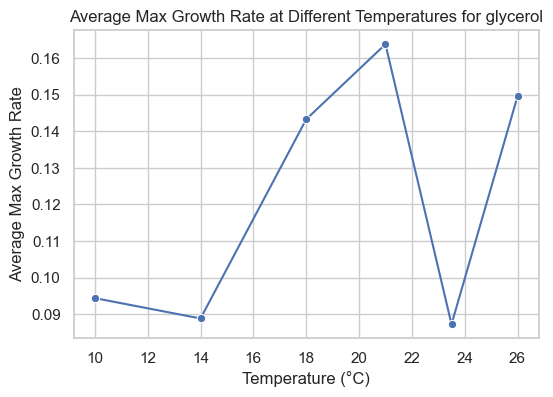

/var/folders/pq/y12h6ypd4750kqt2w5clmhq00000gn/T/ipykernel_56212/2043271478.py:14: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=grouped_df, x='Temperature', y='Max_growth_rate', marker='o', palette='tab10')


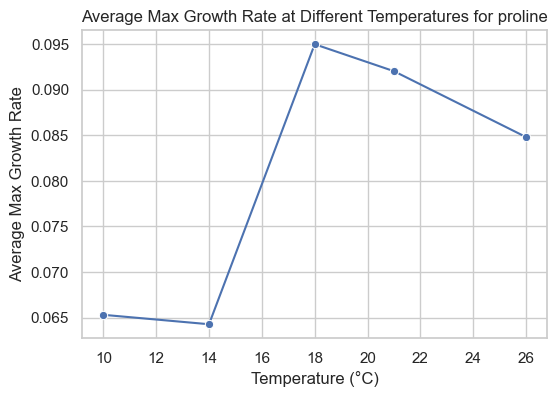

/var/folders/pq/y12h6ypd4750kqt2w5clmhq00000gn/T/ipykernel_56212/2043271478.py:14: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=grouped_df, x='Temperature', y='Max_growth_rate', marker='o', palette='tab10')


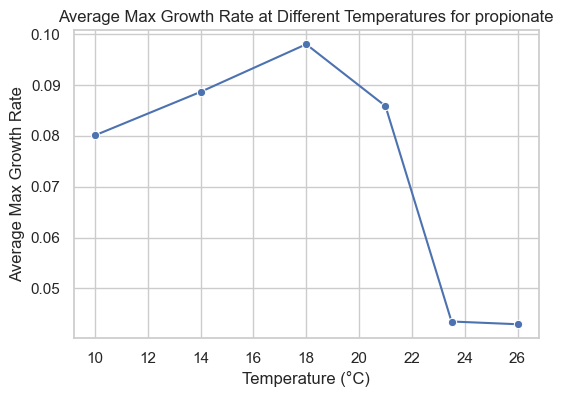

/var/folders/pq/y12h6ypd4750kqt2w5clmhq00000gn/T/ipykernel_56212/2043271478.py:14: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=grouped_df, x='Temperature', y='Max_growth_rate', marker='o', palette='tab10')


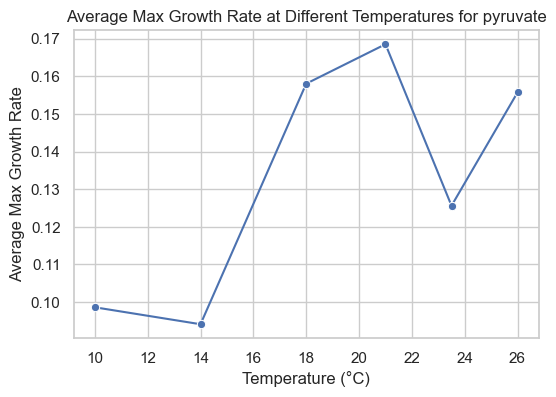

/var/folders/pq/y12h6ypd4750kqt2w5clmhq00000gn/T/ipykernel_56212/2043271478.py:14: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=grouped_df, x='Temperature', y='Max_growth_rate', marker='o', palette='tab10')


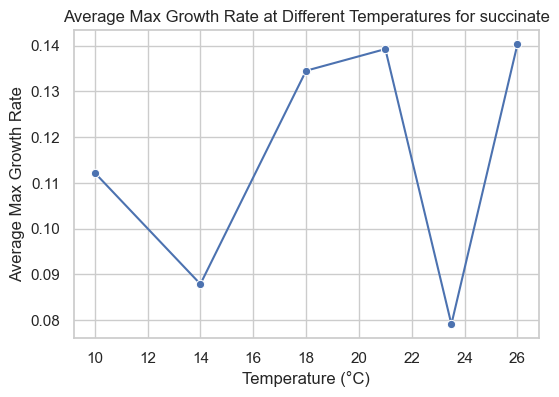

/var/folders/pq/y12h6ypd4750kqt2w5clmhq00000gn/T/ipykernel_56212/2043271478.py:14: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=grouped_df, x='Temperature', y='Max_growth_rate', marker='o', palette='tab10')


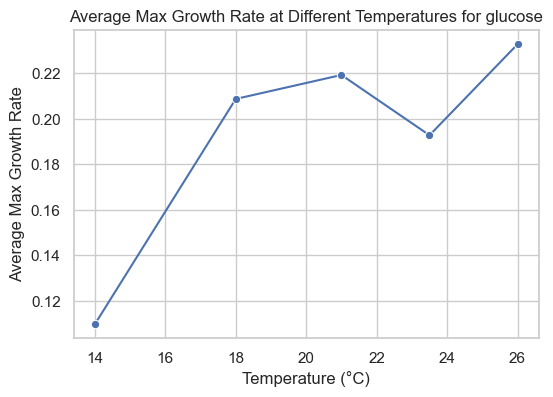

/var/folders/pq/y12h6ypd4750kqt2w5clmhq00000gn/T/ipykernel_56212/2043271478.py:14: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=grouped_df, x='Temperature', y='Max_growth_rate', marker='o', palette='tab10')


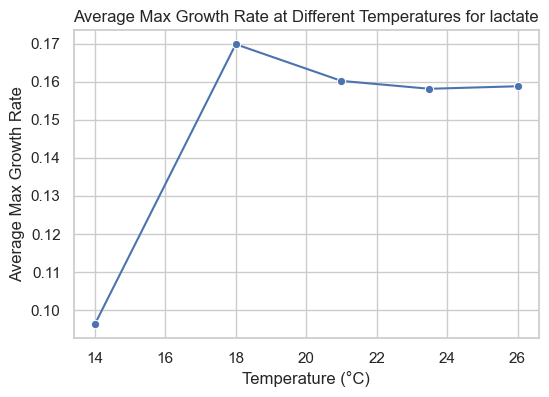

/var/folders/pq/y12h6ypd4750kqt2w5clmhq00000gn/T/ipykernel_56212/2043271478.py:14: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=grouped_df, x='Temperature', y='Max_growth_rate', marker='o', palette='tab10')


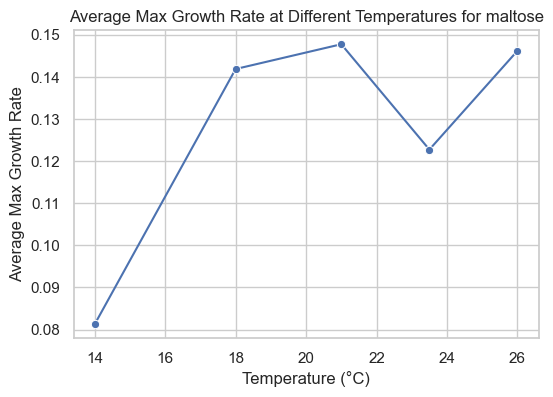

/var/folders/pq/y12h6ypd4750kqt2w5clmhq00000gn/T/ipykernel_56212/2043271478.py:14: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=grouped_df, x='Temperature', y='Max_growth_rate', marker='o', palette='tab10')


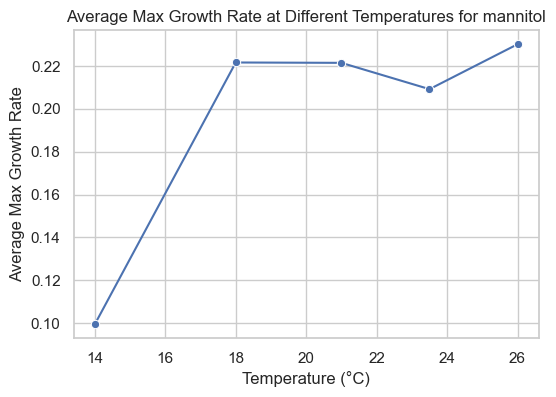

/var/folders/pq/y12h6ypd4750kqt2w5clmhq00000gn/T/ipykernel_56212/2043271478.py:14: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=grouped_df, x='Temperature', y='Max_growth_rate', marker='o', palette='tab10')


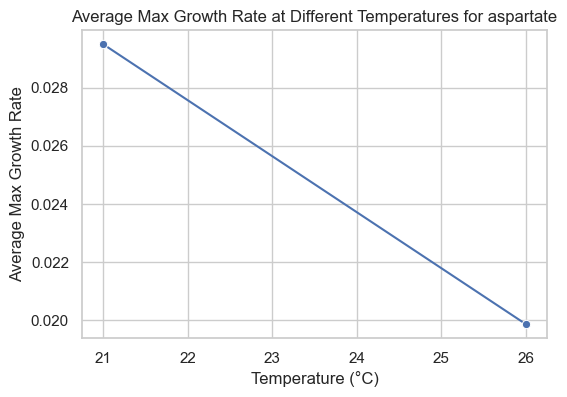

In [38]:
# Get the unique carbon sources
carbon_sources = display_df['Carbon_Source'].unique()

# Create a separate plot for each carbon source
for carbon_source in carbon_sources:
    # Filter the data for the current carbon source
    filtered_df = display_df[display_df['Carbon_Source'] == carbon_source]
    
    # Group by Temperature and calculate mean Max_growth_rate
    grouped_df = filtered_df.groupby('Temperature').agg({'Max_growth_rate': 'mean'}).reset_index()
    
    # Create the line plot
    plt.figure(figsize=(6, 4))
    sns.lineplot(data=grouped_df, x='Temperature', y='Max_growth_rate', marker='o', palette='tab10')
    
    # Set the plot title and labels
    plt.title(f'Average Max Growth Rate at Different Temperatures for {carbon_source}')
    plt.xlabel('Temperature (°C)')
    plt.ylabel('Average Max Growth Rate')
    
    # Show the plot
    plt.show()

In [39]:
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from scipy.stats import linregress


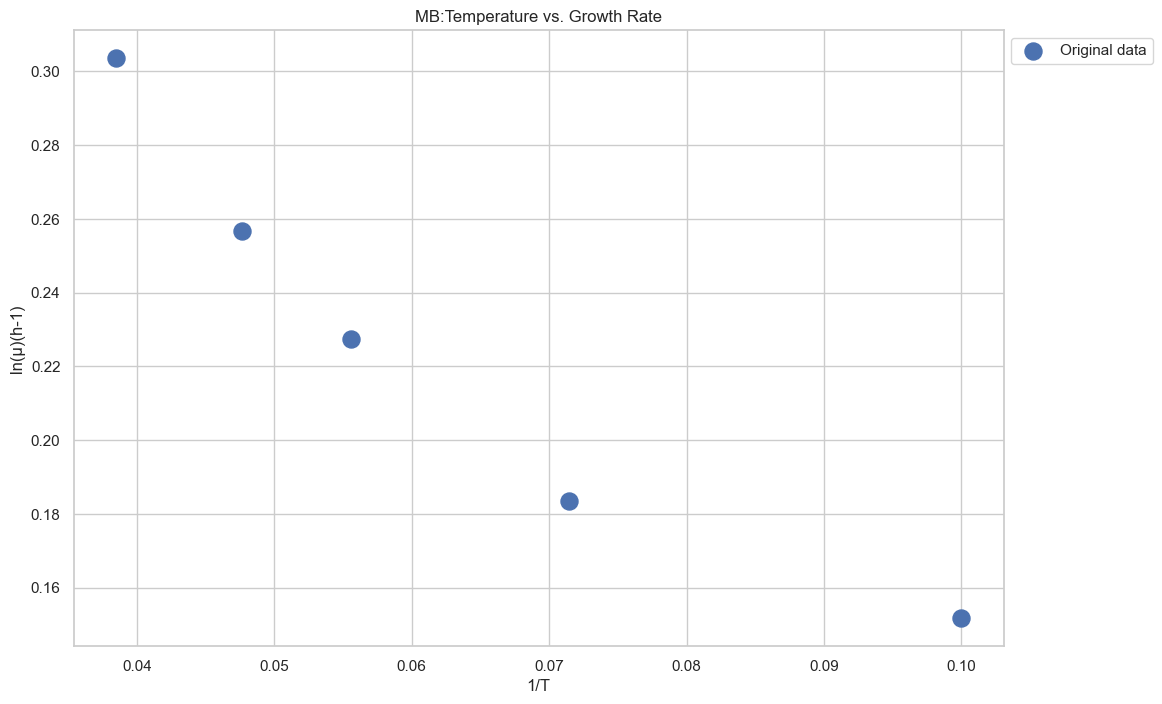

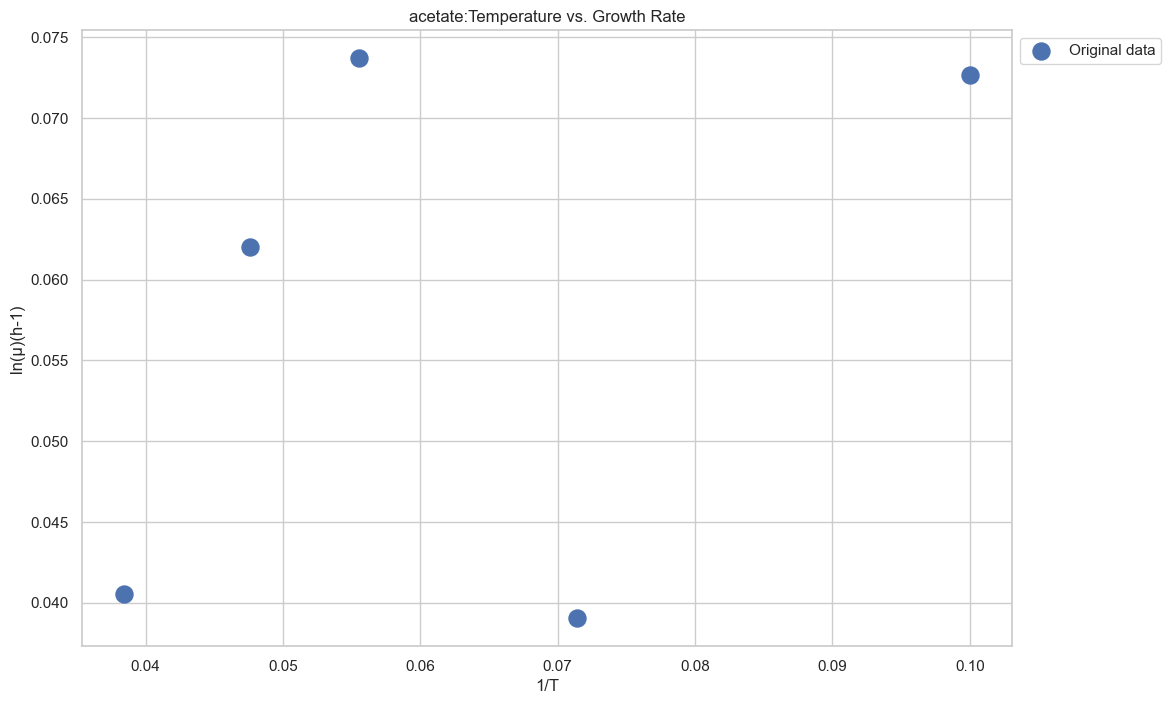

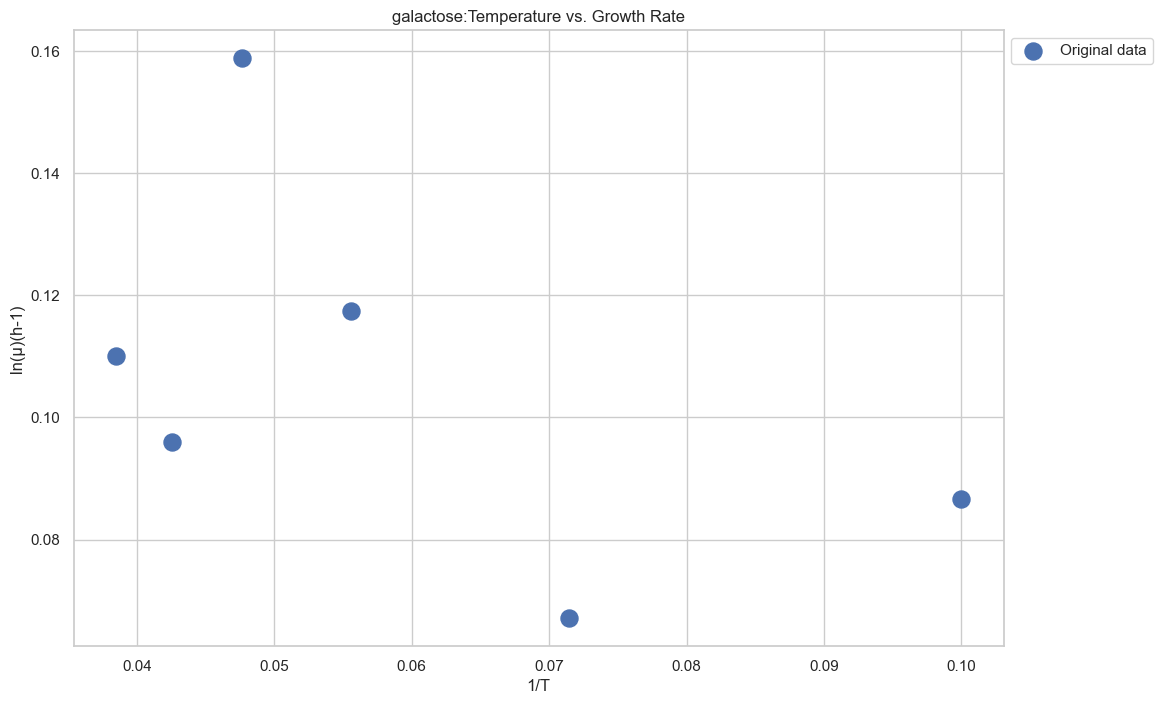

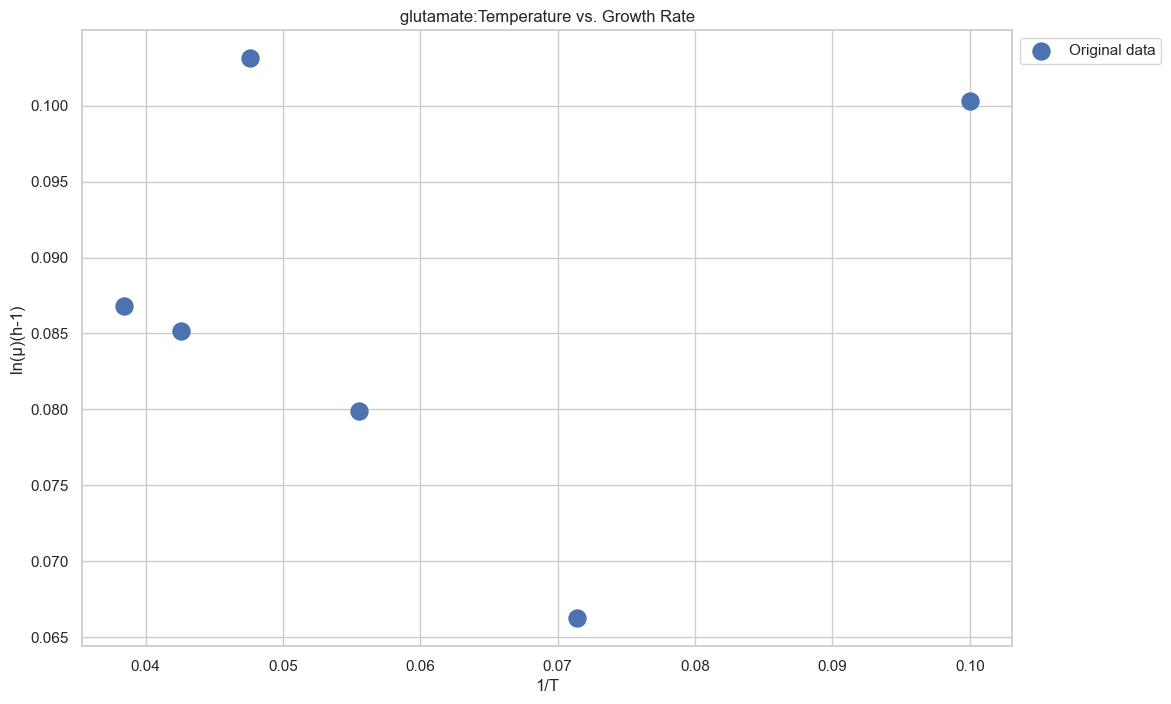

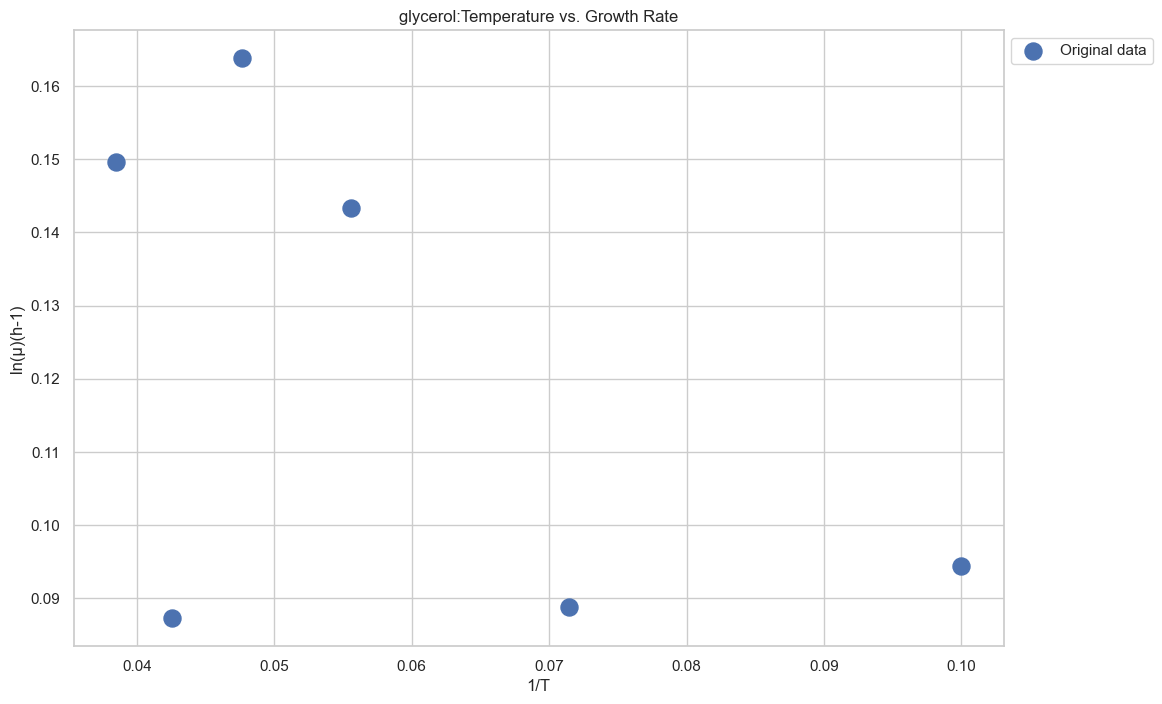

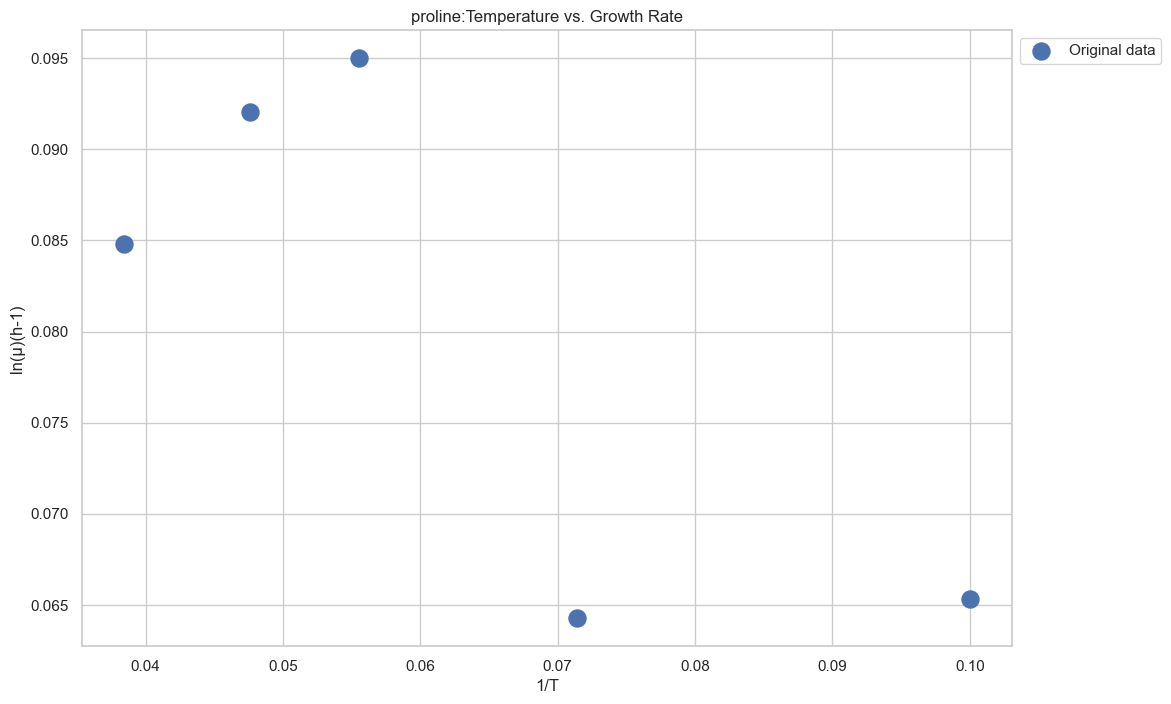

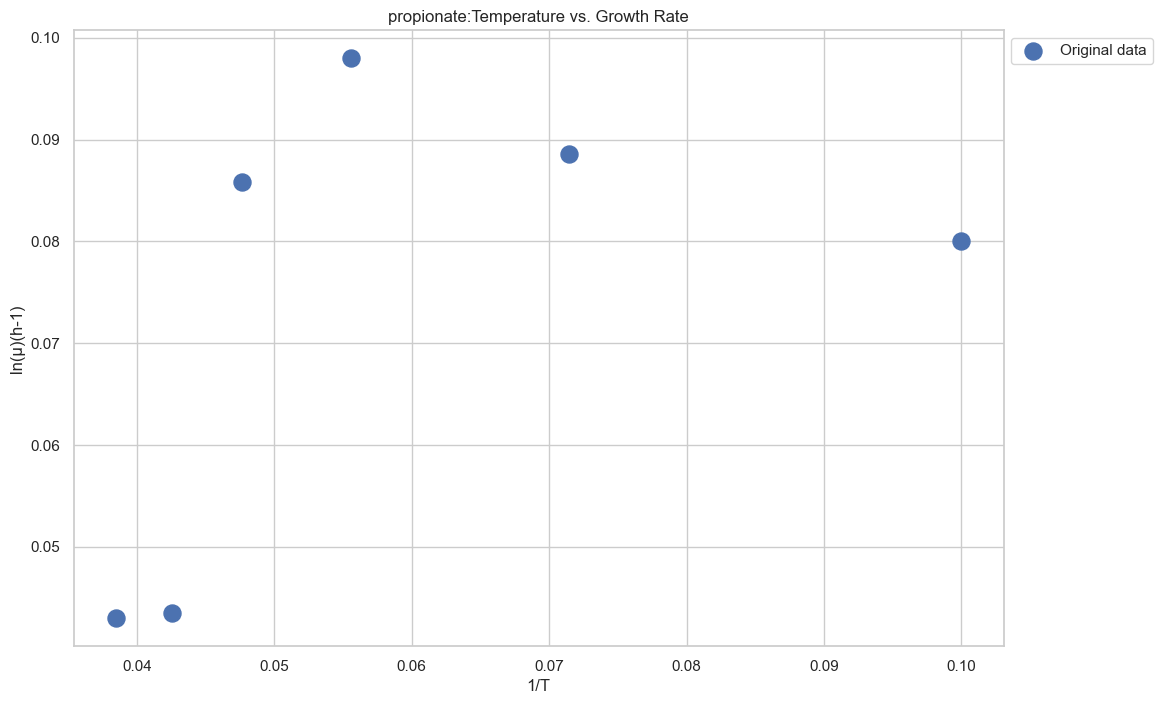

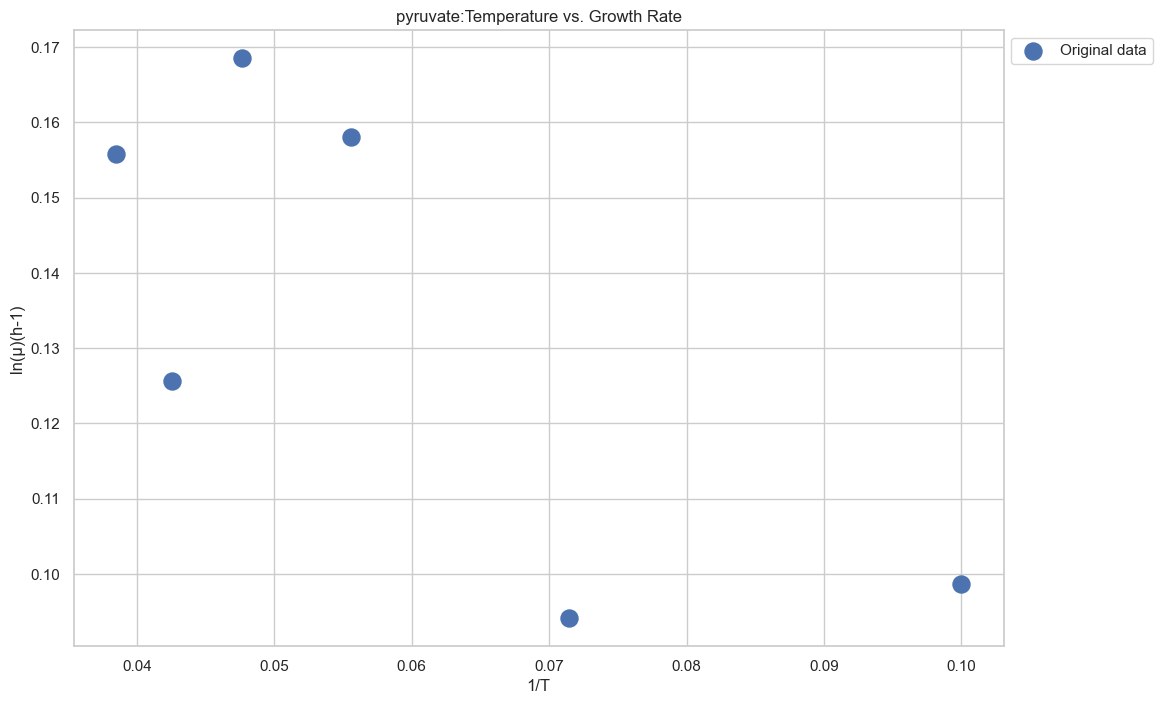

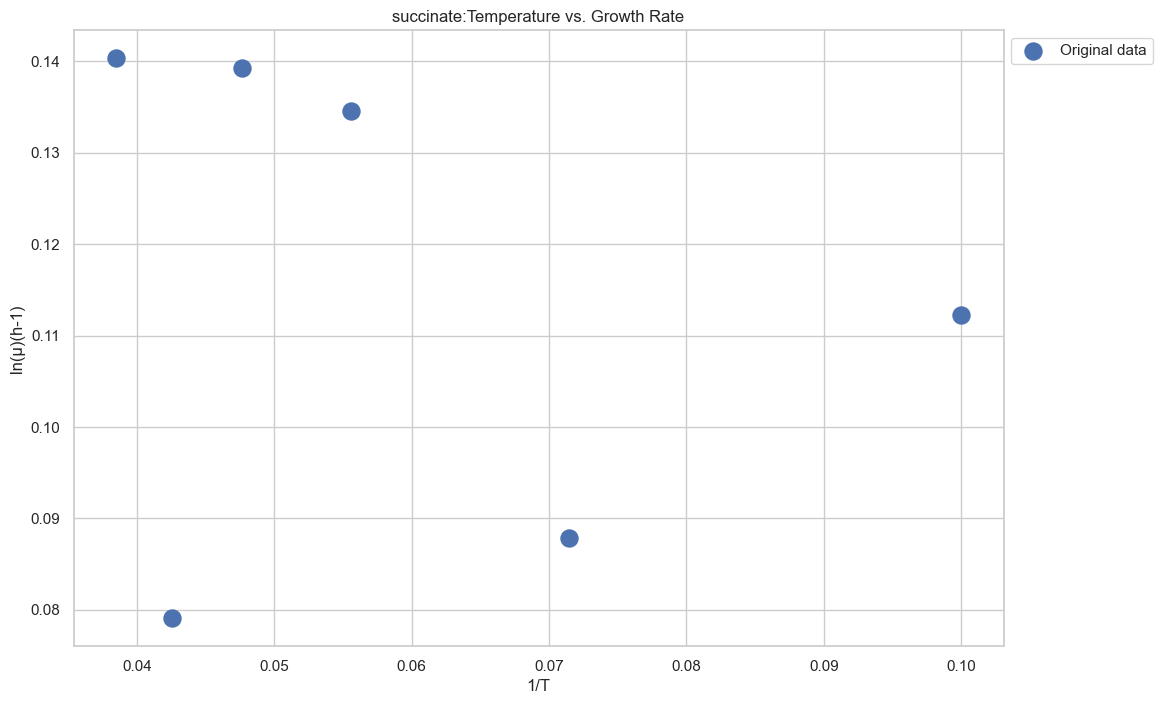

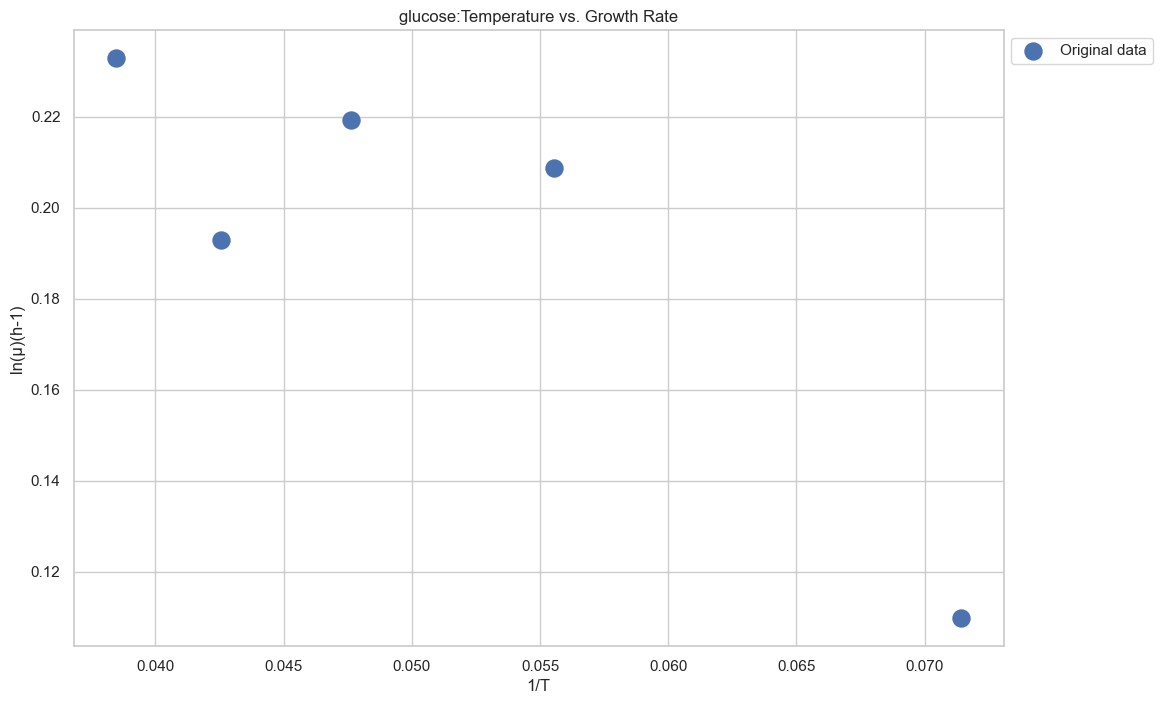

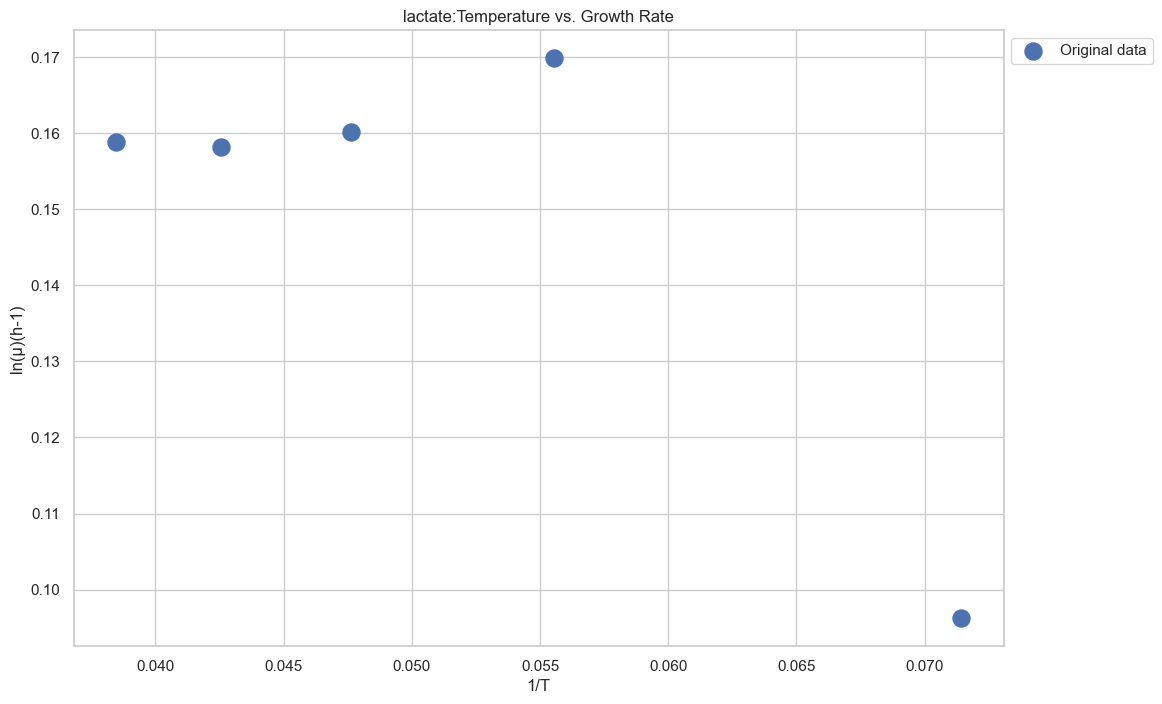

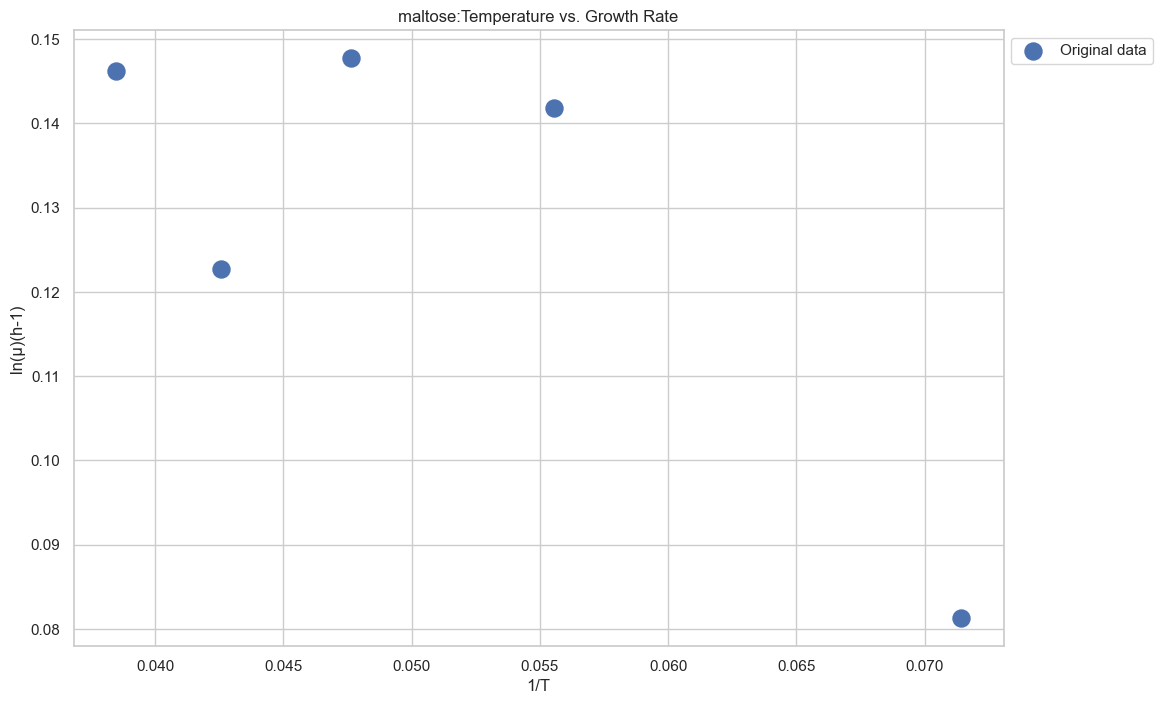

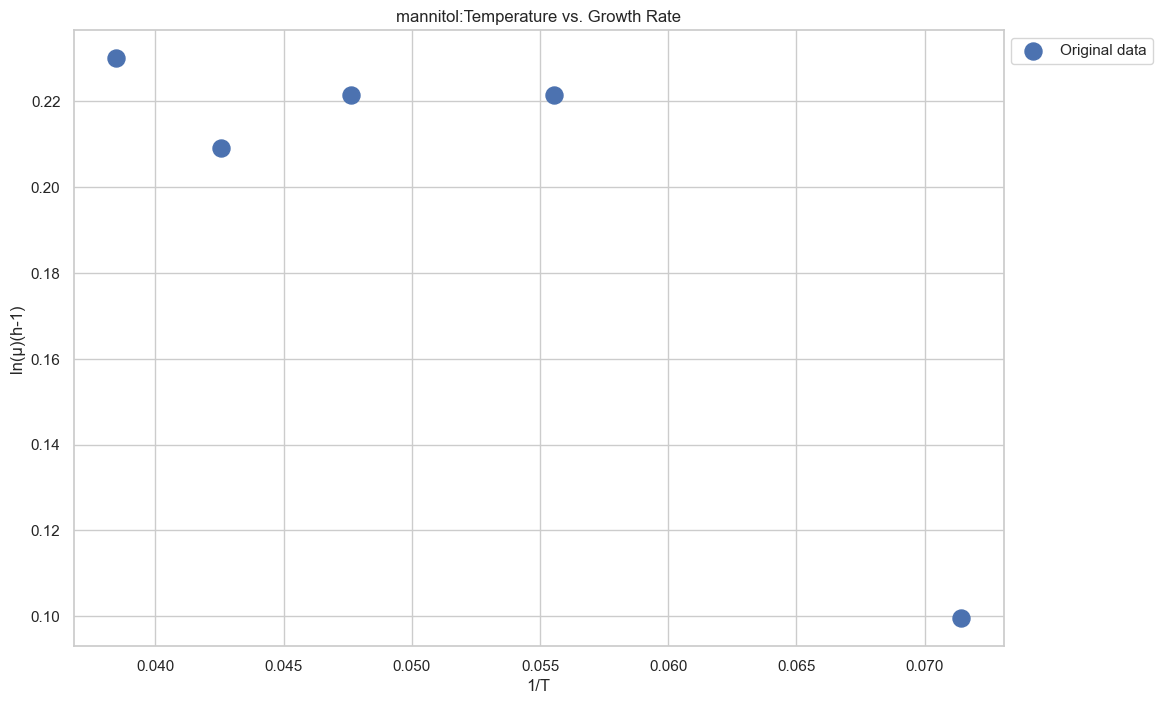

TypeError: The number of func parameters=3 must not exceed the number of data points=2

In [50]:
carbon_sources = display_df['Carbon_Source'].unique()

# Define the model function
def model_func(temperature, a, b, c):
    return -a * np.log(temperature) - b * temperature + c

# Initilize lists to store results
results = []
for carbon_source in carbon_sources:
    # Filter the data for the current carbon source
    filtered_df = display_df[display_df['Carbon_Source'] == carbon_source]
    
    # Group by Temperature and calculate mean Max_growth_rate
    grouped_df = filtered_df.groupby('Temperature').agg({'Max_growth_rate': 'mean'}).reset_index()
    
    # Extract temperature and growth rate values
    temperature = grouped_df['Temperature']
    growth_rate = grouped_df['Max_growth_rate']
    
    # Perform curve fitting with increased max_nfev
    params, params_covariance = curve_fit(model_func, temperature, growth_rate)
    
    # Generate curve fit values for plotting
    temperature_fit = np.linspace(min(temperature), max(temperature), 100)
    growth_rate_fit = model_func(temperature_fit, *params)
    growth_rate_pred = model_func(temperature, *params)
    r2 = r2_score(growth_rate, growth_rate_pred)
    # perform linear regression for p-values

    # append results to list
    results.append({
        'Carbon_Source': carbon_source,
        'R^2': r2,
        'Coefficient a': params[0],
        'Coefficient b': params[1],
        'Coefficient c': params[2]
    })
    
    #print('1/temp_fit',1/temperature_fit)
    #print('np.log(growth_rate_fit)',np.log(growth_rate_fit))
    # Plotting the original data and the curve fit
    plt.figure(figsize=(12, 8))
    plt.scatter(1/temperature, growth_rate,s=150, label='Original data')
    #plt.plot(1/temperature_fit, growth_rate_fit, color='red', label='Fitted curve')
    plt.xlabel('1/T')
    plt.ylabel('ln(µ)(h-1)')
    plt.legend()
    plt.title(f'{carbon_source}:Temperature vs. Growth Rate')
    plt.grid(True)
    
    # Annotate plot with results
    #annotation_text = f"R^2 = {r2:.2f}\nCoefficients:\n  a = {params[0]:.2f}\n  b = {params[1]:.2f}\n  c = {params[2]:.2f}"
    #plt.text(0.95, 0.05, annotation_text, transform=plt.gca().transAxes, fontsize=10, verticalalignment='bottom', horizontalalignment='right', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

    # Place legend outside the plot
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    
    plt.show()


# # Print the fitted parameters
#     print(f"Fitted parameters: a = {params[0]}, b = {params[1]}, c = {params[2]}")

TypeError: The number of func parameters=3 must not exceed the number of data points=2

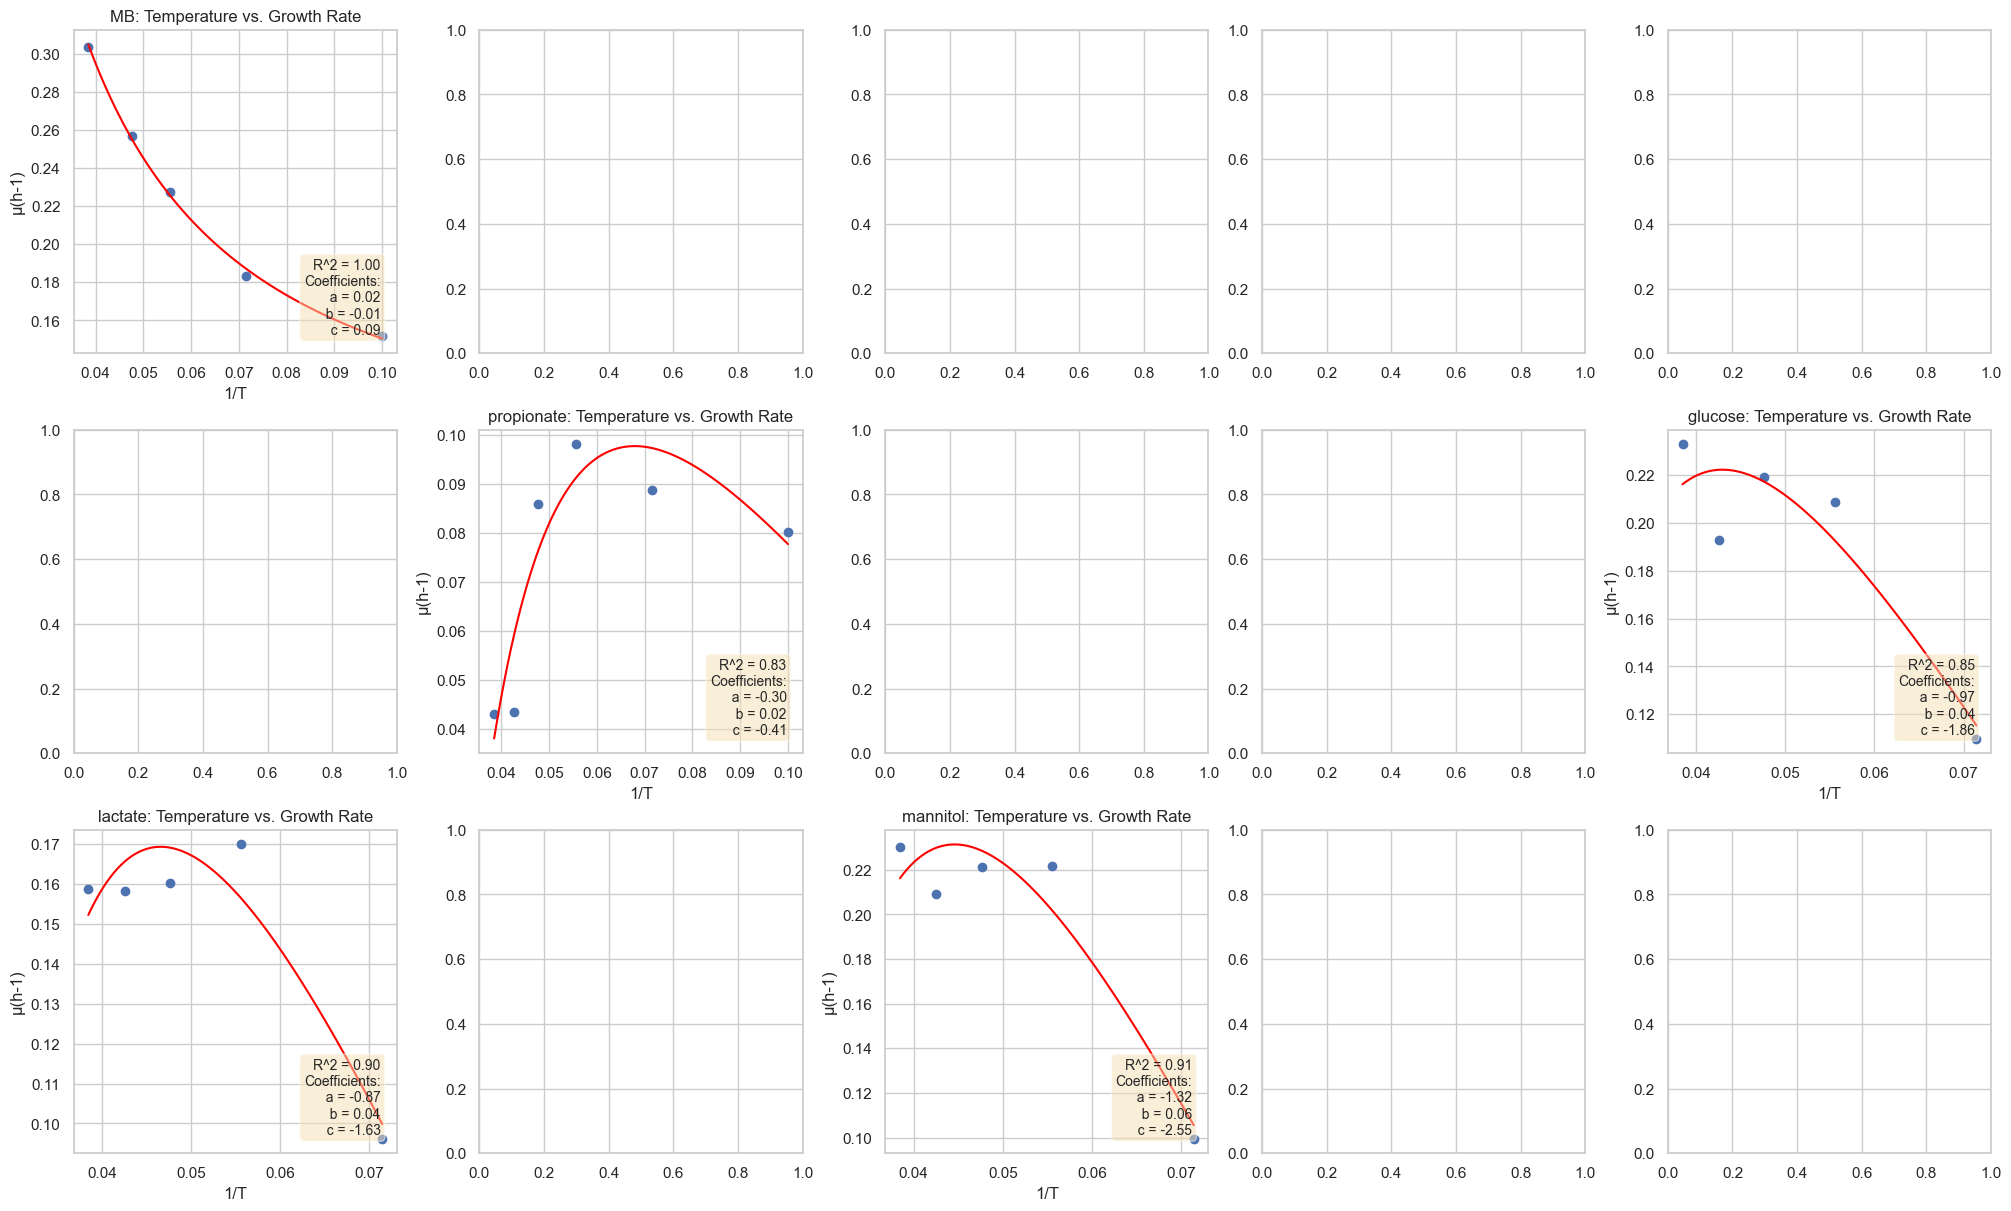

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score

# Define the model function
def model_func(temperature, a, b, c):
    return -a * np.log(temperature) - b * temperature + c

# Initialize lists to store results
results = []
# Define the list of carbon sources (assuming it's defined somewhere in your code)


# Create a figure with subplots in three rows
fig, axs = plt.subplots(3, 5, figsize=(20, 12), constrained_layout=True)

for i, carbon_source in enumerate(carbon_sources):
    # Filter the data for the current carbon source
    filtered_df = display_df[display_df['Carbon_Source'] == carbon_source]
    
    # Group by Temperature and calculate mean Max_growth_rate
    grouped_df = filtered_df.groupby('Temperature').agg({'Max_growth_rate': 'mean'}).reset_index()
    
    # Extract temperature and growth rate values
    temperature = grouped_df['Temperature']
    growth_rate = grouped_df['Max_growth_rate']
    
    # Perform curve fitting with increased max_nfev
    params, params_covariance = curve_fit(model_func, temperature, growth_rate)
    
    # Generate curve fit values for plotting
    temperature_fit = np.linspace(min(temperature), max(temperature), 100)
    growth_rate_fit = model_func(temperature_fit, *params)
    growth_rate_pred = model_func(temperature, *params)
    r2 = r2_score(growth_rate, growth_rate_pred)

    # Append results to list
    results.append({
        'Carbon_Source': carbon_source,
        'R^2': r2,
        'Coefficient a': params[0],
        'Coefficient b': params[1],
        'Coefficient c': params[2]
    })
    
    # Plotting the original data and the curve fit if R^2 > 0.8
    if r2 > 0.8:
        row = i // 5
        col = i % 5
        ax = axs[row, col]
        ax.scatter(1/temperature, growth_rate, label='Original data')
        ax.plot(1/temperature_fit, growth_rate_fit, color='red', label='Fitted curve')
        ax.set_xlabel('1/T')
        ax.set_ylabel('µ(h-1)')
        ax.set_title(f'{carbon_source}: Temperature vs. Growth Rate')
        ax.grid(True)

        # Annotate plot with results
        annotation_text = f"R^2 = {r2:.2f}\nCoefficients:\n  a = {params[0]:.2f}\n  b = {params[1]:.2f}\n  c = {params[2]:.2f}"
        ax.text(0.95, 0.05, annotation_text, transform=ax.transAxes, fontsize=10, verticalalignment='bottom', horizontalalignment='right', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# Remove empty subplots
for j in range(i + 1, 15):
    fig.delaxes(axs.flatten()[j])

# Place the legend outside the plot
fig.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.show()


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score

# Define the model function
def model_func(temperature, a, b, c):
    return -a * np.log(temperature) - b * temperature + c

# Initialize lists to store results
results = []
# Define the list of carbon sources (assuming it's defined somewhere in your code)


# Create a figure with subplots in three rows
fig, axs = plt.subplots(3, 5, figsize=(20, 12), constrained_layout=True)

for i, carbon_source in enumerate(carbon_sources):
    # Filter the data for the current carbon source
    filtered_df = display_df[display_df['Carbon_Source'] == carbon_source]
    
    # Group by Temperature and calculate mean Max_growth_rate
    grouped_df = filtered_df.groupby('Temperature').agg({'Max_growth_rate': 'mean'}).reset_index()
    
    # Extract temperature and growth rate values
    temperature = grouped_df['Temperature']
    growth_rate = grouped_df['Max_growth_rate']
    
    # Perform curve fitting with increased max_nfev
    params, params_covariance = curve_fit(model_func, temperature, growth_rate)
    
    # Generate curve fit values for plotting
    temperature_fit = np.linspace(min(temperature), max(temperature), 100)
    growth_rate_fit = model_func(temperature_fit, *params)
    growth_rate_pred = model_func(temperature, *params)
    r2 = r2_score(growth_rate, growth_rate_pred)

    # Append results to list
    results.append({
        'Carbon_Source': carbon_source,
        'R^2': r2,
        'Coefficient a': params[0],
        'Coefficient b': params[1],
        'Coefficient c': params[2]
    })
    
    # Plotting the original data and the curve fit if R^2 > 0.8
    if r2 > 0.8:
        row = i // 5
        col = i % 5
        ax = axs[row, col]
        ax.scatter(1/temperature, growth_rate, label='Original data')
        ax.plot(1/temperature_fit, growth_rate_fit, color='red', label='Fitted curve')
        ax.set_xlabel('1/T')
        ax.set_ylabel('µ(h-1)')
        ax.set_title(f'{carbon_source}: Temperature vs. Growth Rate')
        ax.grid(True)

        # Annotate plot with results
        annotation_text = f"R^2 = {r2:.2f}\nCoefficients:\n  a = {params[0]:.2f}\n  b = {params[1]:.2f}\n  c = {params[2]:.2f}"
        ax.text(0.95, 0.05, annotation_text, transform=ax.transAxes, fontsize=10, verticalalignment='bottom', horizontalalignment='right', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# Remove empty subplots
for j in range(i + 1, 15):
    fig.delaxes(axs.flatten()[j])

# Place the legend outside the plot
fig.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.show()


KeyError: <Axes: >

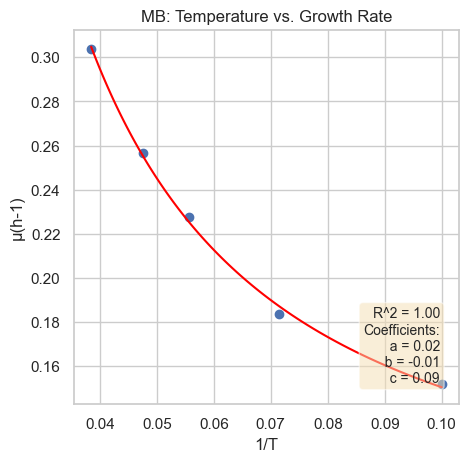

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score

# Define the model function
def model_func(temperature, a, b, c):
    return -a * np.log(temperature) - b * temperature + c

# Initialize lists to store results
results = []


# Create a figure with subplots in three rows
fig, axs = plt.subplots(3, 5, figsize=(20, 12), constrained_layout=True)

for i, carbon_source in enumerate(carbon_sources):
    # Filter the data for the current carbon source
    filtered_df = display_df[display_df['Carbon_Source'] == carbon_source]
    
    # Group by Temperature and calculate mean Max_growth_rate
    grouped_df = filtered_df.groupby('Temperature').agg({'Max_growth_rate': 'mean'}).reset_index()
    
    # Extract temperature and growth rate values
    temperature = grouped_df['Temperature']
    growth_rate = grouped_df['Max_growth_rate']
    
    if len(temperature) > 3:
        #try:
    
        # Perform curve fitting with increased max_nfev
        params, params_covariance = curve_fit(model_func, temperature, growth_rate)

        # Generate curve fit values for plotting
        temperature_fit = np.linspace(min(temperature), max(temperature), 100)
        growth_rate_fit = model_func(temperature_fit, *params)
        growth_rate_pred = model_func(temperature, *params)
        r2 = r2_score(growth_rate, growth_rate_pred)

        # Append results to list
        results.append({
            'Carbon_Source': carbon_source,
            'R^2': r2,
            'Coefficient a': params[0],
            'Coefficient b': params[1],
            'Coefficient c': params[2]
        })

        # Plotting the original data and the curve fit if R^2 > 0.8

        row = i // 5
        col = i % 5
        ax = axs[row, col]
        ax.scatter(1/temperature, growth_rate, label='Original data')
        ax.plot(1/temperature_fit, growth_rate_fit, color='red', label='Fitted curve')
        ax.set_xlabel('1/T')
        ax.set_ylabel('µ(h-1)')
        ax.set_title(f'{carbon_source}: Temperature vs. Growth Rate')
        ax.grid(True)

        # Annotate plot with results
        annotation_text = f"R^2 = {r2:.2f}\nCoefficients:\n  a = {params[0]:.2f}\n  b = {params[1]:.2f}\n  c = {params[2]:.2f}"
        ax.text(0.95, 0.05, annotation_text, transform=ax.transAxes, fontsize=10, verticalalignment='bottom', horizontalalignment='right', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

    # Remove empty subplots
    for j in range(i + 1, 15):
        fig.delaxes(axs.flatten()[j])

# Place the legend outside the plot
fig.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.show()
